In [1]:
import pandas as pd
import random
import numpy as np
import ta as ta
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Dense, Dropout,LSTM, Conv2D, Flatten, MaxPooling2D
from keras.utils import np_utils
from matplotlib import pyplot as plt

from statsmodels.tsa.stattools import adfuller
from keras.utils.vis_utils import plot_model
import pydot
from keras.models import model_from_json
import graphviz
from tensorflow import keras
from time import time
from tensorflow.python.keras.callbacks import TensorBoard
import pandas_datareader
from pandas_datareader import data

import tensorflow.contrib.keras
from tensorflow.contrib.keras import models
from tensorflow.contrib.keras import activations

from tensorflow.contrib.keras import callbacks
from tensorflow.contrib.keras import layers
from tensorflow.contrib.keras import metrics


from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler

import sklearn.svm
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf

from arch import arch_model
import quandl
from statsmodels.tsa.api import VAR, DynamicVAR
from sklearn.linear_model import LinearRegression
from statsmodels.tsa.arima_model import ARIMA
from statsmodels.tsa.arima_model import ARMA

C:\ProgramData\Anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [2]:
def listademodelos():
    ibov_dolar = get_rna(entradas.iloc[:,0:1].values,entradas.iloc[:,1:2].values)
    ibov_usim  = get_rna(entradas.iloc[:,0:1].values,entradas.iloc[:,2:3].values)
    ibov_petr  = get_rna(entradas.iloc[:,0:1].values,entradas.iloc[:,3:4].values)
    ibov_vale  = get_rna(entradas.iloc[:,0:1].values,entradas.iloc[:,4:5].values)
    ibov_bbas  = get_rna(entradas.iloc[:,0:1].values,entradas.iloc[:,5:6].values)
    ibov_itub  = get_rna(entradas.iloc[:,0:1].values,entradas.iloc[:,6:7].values)
    ibov_abev  = get_rna(entradas.iloc[:,0:1].values,entradas.iloc[:,7:8].values)
    ibov_sp    = get_rna(entradas.iloc[:,0:1].values,entradas.iloc[:,8:9].values)
    ibov_wti   = get_rna(entradas.iloc[:,0:1].values,entradas.iloc[:,9:10].values)
    ibov_eurusd   = get_rna(entradas.iloc[:,0:1].values,entradas.iloc[:,10:11].values)

    dolar_usim  = get_rna(entradas.iloc[:,1:2].values,entradas.iloc[:,2:3].values)
    dolar_petr  = get_rna(entradas.iloc[:,1:2].values,entradas.iloc[:,3:4].values)
    dolar_vale  = get_rna(entradas.iloc[:,1:2].values,entradas.iloc[:,4:5].values)
    dolar_bbas  = get_rna(entradas.iloc[:,1:2].values,entradas.iloc[:,5:6].values)
    dolar_itub  = get_rna(entradas.iloc[:,1:2].values,entradas.iloc[:,6:7].values)
    dolar_abev  = get_rna(entradas.iloc[:,1:2].values,entradas.iloc[:,7:8].values)
    dolar_sp    = get_rna(entradas.iloc[:,1:2].values,entradas.iloc[:,8:9].values)
    dolar_wti   = get_rna(entradas.iloc[:,1:2].values,entradas.iloc[:,9:10].values)
    dolar_eurusd   = get_rna(entradas.iloc[:,1:2].values,entradas.iloc[:,10:11].values)

    usim_petr  = get_rna(entradas.iloc[:,2:3].values,entradas.iloc[:,3:4].values)
    usim_vale  = get_rna(entradas.iloc[:,2:3].values,entradas.iloc[:,4:5].values)
    usim_bbas  = get_rna(entradas.iloc[:,2:3].values,entradas.iloc[:,5:6].values)
    usim_itub  = get_rna(entradas.iloc[:,2:3].values,entradas.iloc[:,6:7].values)
    usim_abev  = get_rna(entradas.iloc[:,2:3].values,entradas.iloc[:,7:8].values)
    usim_sp    = get_rna(entradas.iloc[:,2:3].values,entradas.iloc[:,8:9].values)
    usim_wti   = get_rna(entradas.iloc[:,2:3].values,entradas.iloc[:,9:10].values)
    usim_eurusd   = get_rna(entradas.iloc[:,2:3].values,entradas.iloc[:,10:11].values)

    petr_vale  = get_rna(entradas.iloc[:,3:4].values,entradas.iloc[:,4:5].values)
    petr_bbas  = get_rna(entradas.iloc[:,3:4].values,entradas.iloc[:,5:6].values)
    petr_itub  = get_rna(entradas.iloc[:,3:4].values,entradas.iloc[:,6:7].values)
    petr_abev  = get_rna(entradas.iloc[:,3:4].values,entradas.iloc[:,7:8].values)
    petr_sp    = get_rna(entradas.iloc[:,3:4].values,entradas.iloc[:,8:9].values)
    petr_wti   = get_rna(entradas.iloc[:,3:4].values,entradas.iloc[:,9:10].values)
    petr_eurusd   = get_rna(entradas.iloc[:,3:4].values,entradas.iloc[:,10:11].values)

    vale_bbas  = get_rna(entradas.iloc[:,4:5].values,entradas.iloc[:,5:6].values)
    vale_itub  = get_rna(entradas.iloc[:,4:5].values,entradas.iloc[:,6:7].values)
    vale_abev  = get_rna(entradas.iloc[:,4:5].values,entradas.iloc[:,7:8].values)
    vale_sp    = get_rna(entradas.iloc[:,4:5].values,entradas.iloc[:,8:9].values)
    vale_wti   = get_rna(entradas.iloc[:,4:5].values,entradas.iloc[:,9:10].values)
    vale_eurusd   = get_rna(entradas.iloc[:,4:5].values,entradas.iloc[:,10:11].values)

    bbas_itub  = get_rna(entradas.iloc[:,5:6].values,entradas.iloc[:,6:7].values)
    bbas_abev  = get_rna(entradas.iloc[:,5:6].values,entradas.iloc[:,7:8].values)
    bbas_sp    = get_rna(entradas.iloc[:,5:6].values,entradas.iloc[:,8:9].values)
    bbas_wti   = get_rna(entradas.iloc[:,5:6].values,entradas.iloc[:,9:10].values)
    bbas_eurusd   = get_rna(entradas.iloc[:,5:6].values,entradas.iloc[:,10:11].values)

    itub_abev  = get_rna(entradas.iloc[:,6:7].values,entradas.iloc[:,7:8].values)
    itub_sp    = get_rna(entradas.iloc[:,6:7].values,entradas.iloc[:,8:9].values)
    itub_wti   = get_rna(entradas.iloc[:,6:7].values,entradas.iloc[:,9:10].values)
    itub_eurusd   = get_rna(entradas.iloc[:,6:7].values,entradas.iloc[:,10:11].values)


In [3]:
def get_residuals (x,y,mod):
    previsto = modelo.predict(x)
    previsto = pd.DataFrame(previsto)
    previsto.columns = ["Previsto"]
    previsto["Real"] = y
    previsto["Residuos"] = previsto["Previsto"] - previsto["Real"]
    
    return(previsto["Residuos"].values)

In [4]:
def get_garch(dataset, timestep, p=1, q=1, gi = 2):
    previstoGARCH = []
    real = []
    volatilidade = []
    i = timestep
    limite = len(dataset)
    
    while (i < limite):
            inicio = None
            garch = None
            garch_fit = None
            media_garch = None
            variancia_garch = None
            banda_garch = None

            inicio = i-timestep
            garch = arch_model(dataset[inicio:i], mean='Constant', vol='GARCH', p=1,q=1)
            real.append(dataset[i+1])
            garch_fit = garch.fit()
            yhat = garch_fit.forecast(horizon=1)
            media_garch = yhat.mean.dropna().values
            variancia_garch = yhat.variance.dropna().values
            banda_garch = abs(media_garch) + ((variancia_garch)*gi)
            previstoGARCH.append(banda_garch[0][0])
            volatilidade.append(variancia_garch)
            i = i + 1
    previstoGARCH = pd.DataFrame(previstoGARCH)
    previstoGARCH.columns = ["GARCH"]
    real = pd.DataFrame(real)
    real.columns = ["Real"]
    final = pd.concat((previstoGARCH, real), axis=1)
    return(final,volatilidade)

In [5]:
def get_LSTM (dataset, timestep):
    X = dataset.iloc[:,0:1].values
    Y = dataset.iloc[:,1:].values
    train_x = []
    train_y = []
    for i in range(timestep, len(dataset)):
        inicio = None
        inicio = i- timestep
        train_x.append(X[inicio:i,0])
        train_y.append(Y[i,0])
        
    train_x,train_y = np.array(train_x) , np.array(train_y)
    train_x = train_x.reshape( (train_x.shape[0],train_x.shape[1] ,1))
    
    model = Sequential()
    model.add(LSTM(units=timestep, input_shape = (train_x.shape[1],1), return_sequences=True))
    model.add(Dropout(0.2))
    model.add(LSTM(units=timestep, return_sequences=True))
    model.add(Dropout(0.2))
    model.add(LSTM(units=timestep, return_sequences=False))
    model.add(Dropout(0.2))
    model.add(Dense(units=1))
    model.compile(optimizer="adam", loss="mean_absolute_error")
    history = model.fit(train_x,train_y, batch_size= 90, epochs= 100)
    
    return(train_x, train_y, model, history)

In [6]:
def get_rna(x,y):
    model = None
    model = Sequential()
    model.add(Dense(units=64, activation="relu", input_dim= x.shape[1]))
    model.add(Dense(units=64, activation= "relu"))
    model.add(Dropout(0.2))
    model.add(Dense(units=64, activation= "relu"))
    model.add(Dropout(0.1))
    model.add(Dense(units=1, activation = "linear"))
    model.compile(optimizer="adam",loss="mean_absolute_error")
    model.fit(x,y, batch_size = 60, epochs = 100)
    return(model)

In [7]:
def get_lm(y,x):
    model = LinearRegression()
    model.fit(x,y)
    previsto = model.predict(x)
    residuos = y - previsto
    residuos = np.array(residuos)
    print("ADF TEST")
    result = adfuller(residuos.ravel())
    print('ADF Statistic: %f' % result[0])
    print('p-value: %f' % result[1])
    print('Critical Values:')
    for key, value in result[4].items():
        print('\t%s: %.3f' % (key, value))
    
    return(model,residuos, result)

In [8]:
def get_lmnTimestep (y,x, timestep=90, dp = 1):
    residuos = []
    sinal  = []
    adf = []
    media_residuos = None
    dp_residuos = None
    bs_residuos = None
    bi_residuos = None
    residuo_f = None
    
    for i in range(timestep, len(y)):
        inicio = i - timestep
        if(i+1 >= len(y)):
            break
        
        x_ = x[inicio:i]
        y_ = y[inicio:i]
        
        x_topredict = x[i+1]
        y_topredict = y[i+1]
        
        model = LinearRegression()
        model.fit(x_,y_)
        previsto = model.predict(x_)
        residuos_ = y_ - previsto
        residuos_ = np.array(residuos_)
        result = adfuller(residuos_.ravel())
        adf_ = result[1]
        adf.append(adf_)
        if(result[1] < 0.06):
            previsto_ = model.predict(x_topredict.reshape(1,-1))
            residuo_f = y_topredict - previsto_
            media_residuos = residuos_.mean()
            dp_residuos = residuos_.std()
            bs_residuos = media_residuos + (dp_residuos * dp)
            bi_residuos = media_residuos - (dp_residuos * dp)
            sinal_ = np.where(residuo_f > bs_residuos,-1,
                             np.where(residuo_f < bi_residuos,1,0))
            sinal.append(sinal_)
        else:
            sinal_ = 0
            sinal.append(sinal_)
        residuos.append(residuo_f)
    return(model,residuos, sinal,adf)

In [9]:
def get_SVM(y,x):
    model = sklearn.svm.SVR()
    model.fit(x,y)
    previsto = model.predict(x)
    previsto = pd.DataFrame(previsto)
    previsto.columns = ["Previsto"]
    previsto["Real"] = y
    previsto["Residuos"] = previsto["Real"] - previsto["Previsto"]
    
    result = adfuller(previsto["Residuos"].values)
   
    return(model,previsto["Residuos"].values, result)

In [10]:
def get_ARMA(y,p,q, timestep):
    
    y_ = None
    y_tp1 = None
    residuos = None
    previsto = None
    previsto_ = None
    residuo_ = None
    reais = None
    reais = []
    residuos = []
    for i in range(timestep, len(y)):
        inicio = None
        previsto_ = None
        residuo_ = None
        inicio = i - timestep
        if( (i + 1) < len(y)):
            y_ = y[inicio:i]
            y_tp1 = y[1+i]
            model = None
            model = ARIMA(y_, order = (p,1,q))
            model_ = model.fit()
            fc, se, conf = model_.forecast(1, alpha=0.05)  # 95% conf
            residuo_ = y_tp1 - fc
            residuos.append(residuo_)
            reais.append(y_tp1)
        else:
            i = len(y)+10
    return (reais, residuos)

In [11]:
def get_VAR(dataset, timestep, p=1):
    model = VAR(dataset)
    results = model.fit()
    return(results)

In [12]:
ibov = data.DataReader("^BVSP", 
                       start='1990-1-1', 
                       end='2019-06-18', 
                       data_source='yahoo')

sp = data.DataReader("^GSPC", 
                       start='1990-1-1', 
                       end='2019-06-18', 
                       data_source='yahoo')

petr = data.DataReader("PETR4.SA", 
                       start='1990-1-1', 
                       end='2019-06-18', 
                       data_source='yahoo')

usim = data.DataReader("USIM5.SA", 
                       start='1990-1-1', 
                       end='2019-06-18', 
                       data_source='yahoo')


itub = data.DataReader("ITUB4.SA", 
                       start='1990-1-1', 
                       end='2019-06-18', 
                       data_source='yahoo')

bbdc  = data.DataReader("BBDC4.SA", 
                       start='1990-1-1', 
                       end='2019-06-18', 
                       data_source='yahoo')

bbas = data.DataReader("BBAS3.SA", 
                       start='1990-1-1', 
                       end='2019-06-18', 
                       data_source='yahoo')

vale = data.DataReader("VALE3.SA", 
                       start='1990-1-1', 
                       end='2019-06-18', 
                       data_source='yahoo')

usim = data.DataReader("USIM5.SA", 
                       start='1990-1-1', 
                       end='2019-06-18', 
                       data_source='yahoo')

abev = data.DataReader("ABEV3.SA", 
                       start='1990-1-1', 
                       end='2019-06-18', 
                       data_source='yahoo')

wti = data.DataReader("DCOILWTICO", 
                       start='1990-1-1', 
                       end='2019-06-18', 
                       data_source='fred')
eurusd = data.DataReader("DEXUSEU", 
                       start='1990-1-1', 
                       end='2019-06-18', 
                       data_source='fred')

ouro = quandl.get("BCB/4", authtoken="JPEkgYqnux413WHbx9za")
dolar = quandl.get("BCB/10813", authtoken="JPEkgYqnux413WHbx9za")
selic = quandl.get("BCB/11", authtoken="JPEkgYqnux413WHbx9za")
cdi = quandl.get("BCB/12", authtoken="JPEkgYqnux413WHbx9za")

ibov = ibov.dropna()
sp = sp.dropna()
wti = wti.dropna()
eurusd = eurusd.dropna()
ouro = ouro.dropna()
dolar = dolar.dropna()
selic = selic.dropna()
cdi = cdi.dropna()
petr = petr.dropna()
vale = vale.dropna()
itub = itub.dropna()
abev = abev.dropna()
bbas = bbas.dropna()
bbdc = bbdc.dropna()
usim = usim.dropna()

In [13]:
print("IBOV: ",ibov.shape)
print("SP500: ",sp.shape)
print("WTI: ",wti.shape)
print("EURUSD: ",eurusd.shape)
print("CDI: ",cdi.shape)
print("Dolar: ",dolar.shape)
print("PETR4: ",petr.shape)
print("VALE3: ",vale.shape)
print("ITUB4: ",itub.shape)
print("USIM5: ",usim.shape)
print("ABEV: ",abev.shape)
print("BBAS: ",bbas.shape)

IBOV:  (6471, 6)
SP500:  (7424, 6)
WTI:  (7416, 1)
EURUSD:  (5137, 1)
CDI:  (8351, 1)
Dolar:  (8685, 1)
PETR4:  (4782, 6)
VALE3:  (4873, 6)
ITUB4:  (4549, 6)
USIM5:  (4805, 6)
ABEV:  (4840, 6)
BBAS:  (4885, 6)


In [14]:
itub.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2000-12-21,2.98854,2.81517,2.81551,2.96055,74224.0,2.177010
2000-12-22,2.93075,2.81484,2.93075,2.83223,23336.0,2.082653
2000-12-26,2.83471,2.79001,2.81666,2.83140,7839.0,2.082042
2000-12-27,2.92744,2.83140,2.88107,2.92744,27008.0,2.152662
2000-12-28,3.12944,2.86435,2.91088,3.06321,77449.0,2.252501


In [15]:
ibov = ibov[ibov.index.isin(itub.index)]
sp = sp[sp.index.isin(ibov.index)]
wti = wti[wti.index.isin(ibov.index)]
cdi = cdi[cdi.index.isin(ibov.index)]
petr = petr[petr.index.isin(ibov.index)]
vale = vale[vale.index.isin(ibov.index)]
usim = usim[usim.index.isin(ibov.index)]
abev = abev[abev.index.isin(ibov.index)]
bbas = bbas[bbas.index.isin(ibov.index)]
eurusd = eurusd[eurusd.index.isin(ibov.index)]
dolar = dolar[dolar.index.isin(ibov.index)]

In [16]:
ibov = ibov[ibov.index.isin(eurusd.index)]
sp = sp[sp.index.isin(ibov.index)]
wti = wti[wti.index.isin(ibov.index)]
cdi = cdi[cdi.index.isin(ibov.index)]
petr = petr[petr.index.isin(ibov.index)]
vale = vale[vale.index.isin(ibov.index)]
usim = usim[usim.index.isin(ibov.index)]
abev = abev[abev.index.isin(ibov.index)]
bbas = bbas[bbas.index.isin(ibov.index)]
itub = itub[itub.index.isin(ibov.index)]
dolar = dolar[dolar.index.isin(ibov.index)]

In [17]:
ibov = ibov[ibov.index.isin(petr.index)]
sp = sp[sp.index.isin(ibov.index)]
wti = wti[wti.index.isin(ibov.index)]
cdi = cdi[cdi.index.isin(ibov.index)]
eurusd = eurusd[eurusd.index.isin(ibov.index)]
vale = vale[vale.index.isin(ibov.index)]
usim = usim[usim.index.isin(ibov.index)]
abev = abev[abev.index.isin(ibov.index)]
bbas = bbas[bbas.index.isin(ibov.index)]
itub = itub[itub.index.isin(ibov.index)]
dolar = dolar[dolar.index.isin(ibov.index)]

In [18]:
ibov = ibov[ibov.index.isin(wti.index)]
sp = sp[sp.index.isin(ibov.index)]
petr = petr[petr.index.isin(ibov.index)]
cdi = cdi[cdi.index.isin(ibov.index)]
eurusd = eurusd[eurusd.index.isin(ibov.index)]
vale = vale[vale.index.isin(ibov.index)]
usim = usim[usim.index.isin(ibov.index)]
abev = abev[abev.index.isin(ibov.index)]
bbas = bbas[bbas.index.isin(ibov.index)]
itub = itub[itub.index.isin(ibov.index)]
dolar = dolar[dolar.index.isin(ibov.index)]

In [19]:
ibov = ibov[ibov.index.isin(usim.index)]
sp = sp[sp.index.isin(ibov.index)]
petr = petr[petr.index.isin(ibov.index)]
cdi = cdi[cdi.index.isin(ibov.index)]
eurusd = eurusd[eurusd.index.isin(ibov.index)]
vale = vale[vale.index.isin(ibov.index)]
wti = wti[wti.index.isin(ibov.index)]
abev = abev[abev.index.isin(ibov.index)]
bbas = bbas[bbas.index.isin(ibov.index)]
itub = itub[itub.index.isin(ibov.index)]
dolar = dolar[dolar.index.isin(ibov.index)]

In [20]:
ibov = ibov[ibov.index.isin(sp.index)]
usim = usim[usim.index.isin(ibov.index)]
petr = petr[petr.index.isin(ibov.index)]
cdi = cdi[cdi.index.isin(ibov.index)]
eurusd = eurusd[eurusd.index.isin(ibov.index)]
vale = vale[vale.index.isin(ibov.index)]
wti = wti[wti.index.isin(ibov.index)]
abev = abev[abev.index.isin(ibov.index)]
bbas = bbas[bbas.index.isin(ibov.index)]
itub = itub[itub.index.isin(ibov.index)]
dolar = dolar[dolar.index.isin(ibov.index)]

In [21]:
ibov = ibov[ibov.index.isin(abev.index)]
usim = usim[usim.index.isin(ibov.index)]
petr = petr[petr.index.isin(ibov.index)]
cdi = cdi[cdi.index.isin(ibov.index)]
eurusd = eurusd[eurusd.index.isin(ibov.index)]
vale = vale[vale.index.isin(ibov.index)]
wti = wti[wti.index.isin(ibov.index)]
sp = sp[sp.index.isin(ibov.index)]
bbas = bbas[bbas.index.isin(ibov.index)]
itub = itub[itub.index.isin(ibov.index)]
dolar = dolar[dolar.index.isin(ibov.index)]

In [22]:
ibov = ibov[ibov.index.isin(dolar.index)]
usim = usim[usim.index.isin(ibov.index)]
petr = petr[petr.index.isin(ibov.index)]
cdi = cdi[cdi.index.isin(ibov.index)]
eurusd = eurusd[eurusd.index.isin(ibov.index)]
vale = vale[vale.index.isin(ibov.index)]
wti = wti[wti.index.isin(ibov.index)]
sp = sp[sp.index.isin(ibov.index)]
bbas = bbas[bbas.index.isin(ibov.index)]
itub = itub[itub.index.isin(ibov.index)]
abev = abev[abev.index.isin(ibov.index)]

In [23]:
database = pd.concat((np.log(ibov["Close"]),
                      np.log(dolar),
                     np.log(usim["Close"]),
                     np.log(petr["Close"]),
                     np.log(vale["Close"]),
                     np.log(bbas["Close"]),
                     np.log(itub["Close"]),
                     np.log(abev["Close"]),
                     np.log(sp["Close"]),
                     np.log(wti),
                     np.log(eurusd),
                     cdi), axis=1)
database.columns = ["IBOV","DOLAR","USIM5","PETR4","VALE3","BBAS3","ITUB4","ABEV3","SP500","WTI",
                   "EURUSD","CDI"]
database.head()

,IBOV,DOLAR,USIM5,PETR4,VALE3,BBAS3,ITUB4,ABEV3,SP500,WTI,EURUSD,CDI
2000-12-21,9.582249,0.671413,0.638337,1.720532,1.276293,0.676342,1.085375,0.330152,7.150592,3.260402,-0.092993,0.058023
2000-12-22,9.592332,0.668650,0.632452,1.727221,1.299284,0.693147,1.041064,0.306168,7.174686,3.264232,-0.080126,0.057989
2000-12-26,9.602045,0.671413,0.638337,1.720532,1.299284,0.693147,1.040771,0.313423,7.181736,3.295837,-0.073431,0.057955
2000-12-27,9.628129,0.672944,0.703098,1.733865,1.343734,0.703098,1.074128,0.416372,7.192122,3.279030,-0.072141,0.057886
2000-12-28,9.632925,0.670186,0.668398,1.744406,1.354546,0.688135,1.119463,0.437881,7.196102,3.251149,-0.077205,0.057955


In [24]:
database["Retorno IBOV"] = 100 * (database["IBOV"] - database["IBOV"].shift())
database["Retorno DOLAR"] = 100 * (database["DOLAR"] - database["DOLAR"].shift())
database["Retorno USIM5"] = 100 * (database["USIM5"] - database["USIM5"].shift())
database["Retorno PETR4"] = 100 * (database["PETR4"] - database["PETR4"].shift())
database["Retorno VALE3"] = 100 * (database["VALE3"] - database["VALE3"].shift())
database["Retorno BBAS3"] = 100 * (database["BBAS3"] - database["BBAS3"].shift())
database["Retorno ITUB4"] = 100 * (database["ITUB4"] - database["ITUB4"].shift())
database["Retorno ABEV3"] = 100 * (database["ABEV3"] - database["ABEV3"].shift())
database["Retorno SP500"] = 100 * (database["SP500"] - database["SP500"].shift())
database["Retorno WTI"] = 100 * (database["WTI"] - database["WTI"].shift())
database["Retorno EURUSD"] = 100 * (database["EURUSD"] - database["EURUSD"].shift())
database["Retorno CDI"] = 100 * (database["CDI"] - database["CDI"].shift())

database["Retorno Y IBOV"]   = 100 *    -(database["IBOV"] - database["IBOV"].shift(-3))
database["Retorno Y DOLAR"]  = 100 *    -(database["DOLAR"] - database["DOLAR"].shift(-3))
database["Retorno Y USIM5"]  = 100 *    -(database["USIM5"] - database["USIM5"].shift(-3))
database["Retorno Y PETR4"]  = 100 *    -(database["PETR4"] - database["PETR4"].shift(-3))
database["Retorno Y VALE3"]  = 100 *    -(database["VALE3"] - database["VALE3"].shift(-3))
database["Retorno Y BBAS3"]  = 100 *    -(database["BBAS3"] - database["BBAS3"].shift(-3))
database["Retorno Y ITUB4"]  = 100 *    -(database["ITUB4"] - database["ITUB4"].shift(-3))
database["Retorno Y ABEV3"]  = 100 *    -(database["ABEV3"] - database["ABEV3"].shift(-3))
database["Retorno Y SP500"]  = 100 *    -(database["SP500"] - database["SP500"].shift(-3))
database["Retorno Y WTI"]    = 100 *    -(database["WTI"] - database["WTI"].shift(-3))
database["Retorno Y EURUSD"] = 100 *    -(database["EURUSD"] - database["EURUSD"].shift(-3))
database["Retorno Y CDI"]    = 100 *    -(database["CDI"] - database["CDI"].shift(-3))

In [25]:
database = database.dropna()
database.head()

,IBOV,DOLAR,USIM5,PETR4,VALE3,BBAS3,ITUB4,ABEV3,SP500,WTI,...,Retorno Y USIM5,Retorno Y PETR4,Retorno Y VALE3,Retorno Y BBAS3,Retorno Y ITUB4,Retorno Y ABEV3,Retorno Y SP500,Retorno Y WTI,Retorno Y EURUSD,Retorno Y CDI
2000-12-22,9.592332,0.668650,0.632452,1.727221,1.299284,0.693147,1.041064,0.306168,7.174686,3.264232,...,3.594650,1.718480,5.526175,-0.501254,7.839897,13.171303,2.141612,-1.308214,0.292097,-0.0034
2000-12-26,9.602045,0.671413,0.638337,1.720532,1.299284,0.693147,1.040771,0.313423,7.181736,3.295837,...,5.146944,5.653676,-1.835010,5.354072,4.572122,12.445772,-2.456957,1.068347,1.844697,0.0034
2000-12-27,9.628129,0.672944,0.703098,1.733865,1.343734,0.703098,1.074128,0.416372,7.192122,3.279030,...,11.521429,9.269793,-0.000000,10.039625,5.078185,5.292505,1.392898,5.067163,1.800123,-0.0000
2000-12-28,9.632925,0.670186,0.668398,1.744406,1.354546,0.688135,1.119463,0.437881,7.196102,3.251149,...,14.991334,8.617375,-4.396404,10.937257,2.139071,2.104941,-0.065978,7.926781,2.042306,-0.0103
2001-01-02,9.643745,0.661450,0.689807,1.777069,1.280934,0.746688,1.086492,0.437881,7.157167,3.306520,...,9.865077,5.551273,1.835010,5.830026,5.958844,156.595061,1.168269,2.639821,0.736845,-0.0103


In [26]:
treino = database[:"2009-12-31"]

In [27]:
entradas = treino.iloc[:,0:12]

In [28]:
entradas.tail()

,IBOV,DOLAR,USIM5,PETR4,VALE3,BBAS3,ITUB4,ABEV3,SP500,WTI,EURUSD,CDI
2009-12-18,11.109369,0.580594,3.174924,3.599502,3.877432,3.387774,2.863434,1.751203,7.005308,4.294561,0.356345,0.032854
2009-12-21,11.096273,0.575433,3.150597,3.561046,3.874113,3.374169,2.854819,1.753282,7.015757,4.286479,0.359002,0.032890
2009-12-22,11.118667,0.577568,3.179095,3.592919,3.892840,3.365570,2.855867,1.777147,7.019315,4.297013,0.353680,0.032817
2009-12-23,11.121201,0.574082,3.184491,3.602777,3.906206,3.367641,2.847453,1.758115,7.021611,4.331128,0.360537,0.032780
2009-12-28,11.125821,0.553310,3.194583,3.604138,3.908015,3.367641,2.848247,1.763540,7.028006,4.365262,0.364087,0.032817


Estimação dos modelos e testesde Cointegração (Granger)

In [29]:
ibov_dolar, ibovdolarresiduos, adfibovdolar = get_SVM(entradas.iloc[:,0:1].values,entradas.iloc[:,1:2].values)
ibov_usim ,ibovusimresiduos, adfibovusim = get_SVM(entradas.iloc[:,0:1].values,entradas.iloc[:,2:3].values)
ibov_petr, ibovpetrresiduos, adfibovpetr  = get_SVM(entradas.iloc[:,0:1].values,entradas.iloc[:,3:4].values)
ibov_vale , ibovvaleresiduos, adfibovvale = get_SVM(entradas.iloc[:,0:1].values,entradas.iloc[:,4:5].values)
ibov_bbas,ibovbbasresiduos, adfibovbbas  = get_SVM(entradas.iloc[:,0:1].values,entradas.iloc[:,5:6].values)
ibov_itub, ibovitubresiduos, adfibovitub  = get_SVM(entradas.iloc[:,0:1].values,entradas.iloc[:,6:7].values)
ibov_abev, ibovabevresiduos, adfibovabev  = get_SVM(entradas.iloc[:,0:1].values,entradas.iloc[:,7:8].values)
ibov_sp, ibovspresiduos, adfibovsp    = get_SVM(entradas.iloc[:,0:1].values,entradas.iloc[:,8:9].values)
ibov_wti, ibovwtiresiduos, adfibovwti   = get_SVM(entradas.iloc[:,0:1].values,entradas.iloc[:,10:11].values)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), 

In [30]:
# SVM
print("ADF IBOV ~ DOLAR: ",adfibovdolar[1] * 100)
print("ADF IBOV ~ USIM5: ",adfibovusim[1] * 100)
print("ADF IBOV ~ PETR4: ",adfibovpetr[1]* 100)
print("ADF IBOV ~ VALE3: ",adfibovvale[1]* 100)
print("ADF IBOV ~ BBAS3: ",adfibovbbas[1]* 100)
print("ADF IBOV ~ ITUB4: ",adfibovitub[1]* 100)
print("ADF IBOV ~ ABEV3: ",adfibovabev[1]* 100)
print("ADF IBOV ~ WTI: ",adfibovwti[1]* 100)
print("ADF IBOV ~ SP500: ",adfibovsp[1]* 100)

ADF IBOV ~ DOLAR:  6.845432628553014
ADF IBOV ~ USIM5:  1.360950142641576
ADF IBOV ~ PETR4:  0.041034027498577944
ADF IBOV ~ VALE3:  0.015194918084539853
ADF IBOV ~ BBAS3:  0.034845224115395305
ADF IBOV ~ ITUB4:  0.017106077924673932
ADF IBOV ~ ABEV3:  21.338565762975005
ADF IBOV ~ WTI:  7.1409811192868835
ADF IBOV ~ SP500:  87.19297025589347


In [31]:
print("ADF IBOV ~ DOLAR: ",adfibovdolar[1] * 100)
print("ADF IBOV ~ USIM5: ",adfibovusim[1] * 100)
print("ADF IBOV ~ PETR4: ",adfibovpetr[1]* 100)
print("ADF IBOV ~ VALE3: ",adfibovvale[1]* 100)
print("ADF IBOV ~ BBAS3: ",adfibovbbas[1]* 100)
print("ADF IBOV ~ ITUB4: ",adfibovitub[1]* 100)
print("ADF IBOV ~ ABEV3: ",adfibovabev[1]* 100)
print("ADF IBOV ~ WTI: ",adfibovwti[1]* 100)
print("ADF IBOV ~ SP500: ",adfibovsp[1]* 100)

ADF IBOV ~ DOLAR:  6.845432628553014
ADF IBOV ~ USIM5:  1.360950142641576
ADF IBOV ~ PETR4:  0.041034027498577944
ADF IBOV ~ VALE3:  0.015194918084539853
ADF IBOV ~ BBAS3:  0.034845224115395305
ADF IBOV ~ ITUB4:  0.017106077924673932
ADF IBOV ~ ABEV3:  21.338565762975005
ADF IBOV ~ WTI:  7.1409811192868835
ADF IBOV ~ SP500:  87.19297025589347


In [32]:
dolar_usim, residuos_dolusim ,adfdolusim = get_SVM(entradas.iloc[:,1:2].values,entradas.iloc[:,2:3].values)
dolar_petr , residuos_dolpetr, adfdolpetr = get_SVM(entradas.iloc[:,1:2].values,entradas.iloc[:,3:4].values)
dolar_vale , residuos_dolvale,adfdolvale = get_SVM(entradas.iloc[:,1:2].values,entradas.iloc[:,4:5].values)
dolar_bbas  , residuos_dolbbas,adfdolbbas= get_SVM(entradas.iloc[:,1:2].values,entradas.iloc[:,5:6].values)
dolar_itub, residuos_dolitub,adfdolitub  = get_SVM(entradas.iloc[:,1:2].values,entradas.iloc[:,6:7].values)
dolar_abev, residuos_dolabev,adfdolabev = get_SVM(entradas.iloc[:,1:2].values,entradas.iloc[:,7:8].values)
dolar_sp   , residuos_dolsp,adfdolsp = get_SVM(entradas.iloc[:,1:2].values,entradas.iloc[:,8:9].values)
dolar_wti  , residuos_dolwti,adfdolwti = get_SVM(entradas.iloc[:,1:2].values,entradas.iloc[:,9:10].values)
dolar_eurusd, residuos_doleurusd,adfdoleur   = get_SVM(entradas.iloc[:,1:2].values,entradas.iloc[:,10:11].values)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), 

In [33]:
print("ADF DOLAR ~ USIM5: ",adfdolusim[1] * 100)
print("ADF DOLAR ~ PETR4: ",adfdolpetr[1]* 100)
print("ADF DOLAR ~ VALE3: ",adfdolvale[1]* 100)
print("ADF DOLAR ~ BBAS3: ",adfdolbbas[1]* 100)
print("ADF DOLAR ~ ITUB4: ",adfdolitub[1]* 100)
print("ADF DOLAR ~ ABEV3: ",adfdolabev[1]* 100)
print("ADF DOLAR ~ WTI: ",adfdolwti[1]* 100)
print("ADF DOLAR ~ SP500: ",adfdolsp[1]* 100)
print("ADF DOLAR ~ EURUSD: ",adfdoleur[1]* 100)

ADF DOLAR ~ USIM5:  8.573675397091407
ADF DOLAR ~ PETR4:  0.5959748254053775
ADF DOLAR ~ VALE3:  0.7769106636933177
ADF DOLAR ~ BBAS3:  0.11615733255580854
ADF DOLAR ~ ITUB4:  0.34061514504202006
ADF DOLAR ~ ABEV3:  16.391373729436587
ADF DOLAR ~ WTI:  0.7037174722036812
ADF DOLAR ~ SP500:  68.18340623604122
ADF DOLAR ~ EURUSD:  2.5216196325348044


In [34]:
usim_petr, usimpetrresiduos, adfusimpetr  = get_SVM(entradas.iloc[:,2:3].values,entradas.iloc[:,3:4].values)
usim_vale, usimvaleresiduos, adfusimvale  = get_SVM(entradas.iloc[:,2:3].values,entradas.iloc[:,4:5].values)
usim_bbas, usimbbasresiduos, adfusimbbas  = get_SVM(entradas.iloc[:,2:3].values,entradas.iloc[:,5:6].values)
usim_itub, usimitubresiduos, adfusimitub = get_SVM(entradas.iloc[:,2:3].values,entradas.iloc[:,6:7].values)
usim_abev, usimabevresiduos, adfusimabev  = get_SVM(entradas.iloc[:,2:3].values,entradas.iloc[:,7:8].values)
usim_sp, usimspresiduos, adfusimsp    = get_SVM(entradas.iloc[:,2:3].values,entradas.iloc[:,8:9].values)
usim_wti, usimwtiresiduos, adfusimwti   = get_SVM(entradas.iloc[:,2:3].values,entradas.iloc[:,9:10].values)
usim_eurusd, usimeurusdresiduos, adfusimeurusd   = get_SVM(entradas.iloc[:,2:3].values,entradas.iloc[:,10:11].values)


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), 

In [35]:
print("ADF USIM5 ~ PETR4: ",adfusimpetr[1] * 100)
print("ADF USIM5 ~ VALE3: ",adfusimvale[1] * 100)
print("ADF USIM5 ~ BBAS3: ",adfusimbbas[1] * 100)
print("ADF USIM5 ~ ITUB: ",adfusimitub[1] * 100)
print("ADF USIM5 ~ ABEV: ",adfusimabev[1] * 100)
print("ADF USIM5 ~ SP500: ",adfusimsp[1] * 100)
print("ADF USIM5 ~ WTI: ",adfusimwti[1] * 100)
print("ADF USIM5 ~ EURUSD: ",adfusimeurusd[1] * 100)


ADF USIM5 ~ PETR4:  0.14303122306623142
ADF USIM5 ~ VALE3:  0.17088856324212978
ADF USIM5 ~ BBAS3:  0.0025173575784323697
ADF USIM5 ~ ITUB:  0.021723545737339766
ADF USIM5 ~ ABEV:  4.650748811757141
ADF USIM5 ~ SP500:  47.797145096493196
ADF USIM5 ~ WTI:  0.8724845049018387
ADF USIM5 ~ EURUSD:  5.781700817060736


In [36]:
petr_vale, petrvaleresiduos, adfpetrvale  = get_SVM(entradas.iloc[:,3:4].values,entradas.iloc[:,4:5].values)
petr_bbas , petrbbasresiduos, adfpetrbbas= get_SVM(entradas.iloc[:,3:4].values,entradas.iloc[:,5:6].values)
petr_itub , petritubresiduos, adfpetritub = get_SVM(entradas.iloc[:,3:4].values,entradas.iloc[:,6:7].values)
petr_abev , petrabevresiduos, adfpetrabev = get_SVM(entradas.iloc[:,3:4].values,entradas.iloc[:,7:8].values)
petr_sp   , petrspresiduos, adfpetrsp = get_SVM(entradas.iloc[:,3:4].values,entradas.iloc[:,8:9].values)
petr_wti , petrwtiresiduos, adfpetrwti  = get_SVM(entradas.iloc[:,3:4].values,entradas.iloc[:,9:10].values)
petr_eurusd , petreurusdresiduos, adfpetreurusd  = get_SVM(entradas.iloc[:,3:4].values,entradas.iloc[:,10:11].values)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), 

In [37]:
print("ADF PETR4 ~ VALE3: ",adfpetrvale[1] * 100)
print("ADF PETR4 ~ BBAS3: ",adfpetrbbas[1] * 100)
print("ADF PETR4 ~ ITUB4: ",adfpetritub[1] * 100)
print("ADF PETR4 ~ ABEV3: ",adfpetrabev[1] * 100)
print("ADF PETR4 ~ SP500: ",adfpetrsp[1] * 100)
print("ADF PETR4 ~ WTI: ",adfpetrwti[1] * 100)
print("ADF PETR4 ~ EURUSD: ",adfpetreurusd[1] * 100)

ADF PETR4 ~ VALE3:  0.10474028278592162
ADF PETR4 ~ BBAS3:  0.20013542071030607
ADF PETR4 ~ ITUB4:  0.4404816453302011
ADF PETR4 ~ ABEV3:  33.32865053170542
ADF PETR4 ~ SP500:  51.5337897561537
ADF PETR4 ~ WTI:  2.215704323669315
ADF PETR4 ~ EURUSD:  8.248182789965103


In [38]:
vale_bbas, valebbasresiduos, adfvalebbas  = get_SVM(entradas.iloc[:,4:5].values,entradas.iloc[:,5:6].values)
vale_itub, valeitubresiduos, adfvaleitub  = get_SVM(entradas.iloc[:,4:5].values,entradas.iloc[:,6:7].values)
vale_abev, valeabevresiduos, adfvaleabev  = get_SVM(entradas.iloc[:,4:5].values,entradas.iloc[:,7:8].values)
vale_sp, valewtiresiduos, adfvalesp    = get_SVM(entradas.iloc[:,4:5].values,entradas.iloc[:,8:9].values)
vale_wti, valewtiresiduos, adfvalewti   = get_SVM(entradas.iloc[:,4:5].values,entradas.iloc[:,9:10].values)
vale_eurusd, valeeurusdsresiduos, adfvaleeurusd   = get_SVM(entradas.iloc[:,4:5].values,entradas.iloc[:,10:11].values)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), 

In [39]:
print("ADF VALE3 ~ BBAS3: ",  adfvalebbas[1] * 100)
print("ADF VALE3 ~ ITUB4: ",  adfvaleitub[1] * 100)
print("ADF VALE3 ~ ABEV3: ",  adfvaleabev[1] * 100)
print("ADF VALE3 ~ SP500: ",  adfvalesp[1] * 100)
print("ADF VALE3 ~ WTI: "  ,  adfvalewti[1] * 100)
print("ADF VALE3 ~ EURUSD: ", adfvaleeurusd[1] * 100)

ADF VALE3 ~ BBAS3:  0.12475742160337068
ADF VALE3 ~ ITUB4:  0.6561538371995486
ADF VALE3 ~ ABEV3:  18.552247341922023
ADF VALE3 ~ SP500:  25.63867992694613
ADF VALE3 ~ WTI:  1.8290450234116957
ADF VALE3 ~ EURUSD:  4.051431965096442


In [40]:
bbas_itub, bbasitubresiduos, adfbbasitub  = get_lm(entradas.iloc[:,5:6].values,entradas.iloc[:,6:7].values)
bbas_abev, bbasabevresiduos, adfbbasabev  = get_lm(entradas.iloc[:,5:6].values,entradas.iloc[:,7:8].values)
bbas_sp , bbasspresiduos, adfbbassp   = get_lm(entradas.iloc[:,5:6].values,entradas.iloc[:,8:9].values)
bbas_wti, bbaswtiresiduos, adfbbaswti   = get_lm(entradas.iloc[:,5:6].values,entradas.iloc[:,9:10].values)
bbas_eurusd, bbaseurusdresiduos, adfbbaseurusd   = get_lm(entradas.iloc[:,5:6].values,entradas.iloc[:,10:11].values)

ADF TEST
ADF Statistic: -4.509823
p-value: 0.000189
Critical Values:
	1%: -3.433
	5%: -2.863
	10%: -2.567
ADF TEST
ADF Statistic: -2.105052
p-value: 0.242488
Critical Values:
	1%: -3.433
	5%: -2.863
	10%: -2.567
ADF TEST
ADF Statistic: -1.990634
p-value: 0.290695
Critical Values:
	1%: -3.433
	5%: -2.863
	10%: -2.567
ADF TEST
ADF Statistic: -3.249473
p-value: 0.017294
Critical Values:
	1%: -3.433
	5%: -2.863
	10%: -2.567
ADF TEST
ADF Statistic: -2.565788
p-value: 0.100276
Critical Values:
	1%: -3.433
	5%: -2.863
	10%: -2.567


In [41]:
print("ADF BBAS3 ~ ITUB4: ",  adfbbasitub[1] * 100)
print("ADF BBAS3 ~ ABEV3: ",  adfbbasabev[1] * 100)
print("ADF BBAS3 ~ SP500: ",  adfbbassp[1] * 100)
print("ADF BBAS3 ~ WTI: "  ,  adfbbaswti[1] * 100)
print("ADF BBAS3 ~ EURUSD: ", adfbbaseurusd[1] * 100)

ADF BBAS3 ~ ITUB4:  0.018875807002496976
ADF BBAS3 ~ ABEV3:  24.248813346629284
ADF BBAS3 ~ SP500:  29.06947672301923
ADF BBAS3 ~ WTI:  1.7293730777421759
ADF BBAS3 ~ EURUSD:  10.02763788508077


In [42]:
itub_abev, residuositubabev, adfitubabev  = get_SVM(entradas.iloc[:,6:7].values,entradas.iloc[:,7:8].values)
itub_sp , residuositubsp, adfitubsp   = get_SVM(entradas.iloc[:,6:7].values,entradas.iloc[:,8:9].values)
itub_wti, residuositubwti, adfitubwti   = get_SVM(entradas.iloc[:,6:7].values,entradas.iloc[:,9:10].values)
itub_eurusd , residuositubeurusd, adfitubeurusd  = get_SVM(entradas.iloc[:,6:7].values,entradas.iloc[:,10:11].values)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), 

In [43]:
print("ADF ITUB4 ~ ABEV3: ",  adfitubabev[1] * 100)
print("ADF ITUB4 ~ SP500: ",  adfitubsp[1] * 100)
print("ADF ITUB4 ~ WTI: "  ,  adfitubwti[1] * 100)
print("ADF ITUB4 ~ EURUSD: ", adfitubeurusd[1] * 100)

ADF ITUB4 ~ ABEV3:  31.128669052739045
ADF ITUB4 ~ SP500:  64.43023807226939
ADF ITUB4 ~ WTI:  0.05553126022699036
ADF ITUB4 ~ EURUSD:  16.34574321105221


Modelos escolhidos: 

Critério ADF <= 5%

In [63]:
print("ADF IBOV ~ PETR4: ",   adfibovpetr[1]* 100)
print("ADF IBOV ~ VALE3: ",   adfibovvale[1]* 100)
print("ADF IBOV ~ BBAS3: ",   adfibovbbas[1]* 100)
print("ADF IBOV ~ ITUB4: ",   adfibovitub[1]* 100)
print("ADF DOLAR ~ PETR4: ",  adfdolpetr[1]* 100)
print("ADF DOLAR ~ VALE3: ",  adfdolvale[1]* 100)
print("ADF DOLAR ~ BBAS3: ",  adfdolbbas[1]* 100)
print("ADF DOLAR ~ ITUB4: ",  adfdolitub[1]* 100)
print("ADF USIM5 ~ BBAS3: ",  adfusimbbas[1] * 100)
print("ADF USIM5 ~ WTI: ",    adfusimwti[1] * 100)
print("ADF USIM5 ~ EURUSD: ", adfusimeurusd[1] * 100)
print("ADF PETR4 ~ BBAS3: ",  adfpetrbbas[1] * 100)
print("ADF PETR4 ~ ITUB4: ",  adfpetritub[1] * 100)
print("ADF VALE3 ~ BBAS3: ",  adfvalebbas[1] * 100)
print("ADF VALE3 ~ WTI: "  ,  adfvalewti[1] * 100)
print("ADF BBAS3 ~ ITUB4: ",  adfbbasitub[1] * 100)
print("ADF BBAS3 ~ WTI: "  ,  adfbbaswti[1] * 100)
print("ADF ITUB4 ~ WTI: "  ,  adfitubwti[1] * 100)

ADF IBOV ~ PETR4:  0.041034027498577944
ADF IBOV ~ VALE3:  0.015194918084539853
ADF IBOV ~ BBAS3:  0.034845224115395305
ADF IBOV ~ ITUB4:  0.017106077924673932
ADF DOLAR ~ PETR4:  0.5959748254053775
ADF DOLAR ~ VALE3:  0.7769106636933177
ADF DOLAR ~ BBAS3:  0.11615733255580854
ADF DOLAR ~ ITUB4:  0.34061514504202006
ADF USIM5 ~ BBAS3:  0.0025173575784323697
ADF USIM5 ~ WTI:  0.8724845049018387
ADF USIM5 ~ EURUSD:  5.781700817060736
ADF PETR4 ~ BBAS3:  0.20013542071030607
ADF PETR4 ~ ITUB4:  0.4404816453302011
ADF VALE3 ~ BBAS3:  0.12475742160337068
ADF VALE3 ~ WTI:  1.8290450234116957
ADF BBAS3 ~ ITUB4:  0.018875807002496976
ADF BBAS3 ~ WTI:  1.7293730777421759
ADF ITUB4 ~ WTI:  0.05553126022699036


Gráficos dos Residuos

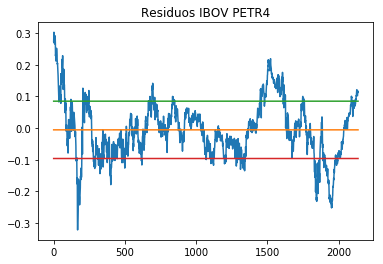

In [64]:
media_residuos_ibovpetr = ibovpetrresiduos.mean()
dp_residuos_ibovpetr = ibovpetrresiduos.std()
bs_residuos_ibovpetr = media_residuos_ibovpetr + dp_residuos_ibovpetr
bi_residuos_ibovpetr = media_residuos_ibovpetr - dp_residuos_ibovpetr



plt.plot(ibovpetrresiduos)
plt.plot((0*ibovpetrresiduos) + media_residuos_ibovpetr)
plt.plot((0*ibovpetrresiduos) + bs_residuos_ibovpetr)
plt.plot((0*ibovpetrresiduos) + bi_residuos_ibovpetr)

plt.title("Residuos IBOV PETR4")
plt.show()


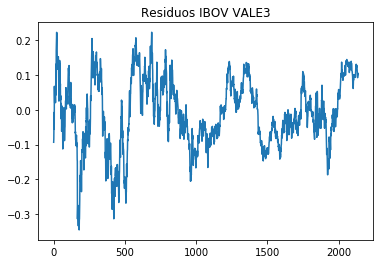

In [65]:
media_residuos_ibovvale = ibovvaleresiduos.mean()
dp_residuos_ibovvale = ibovvaleresiduos.std()
bs_residuos_ibovvale = media_residuos_ibovvale + dp_residuos_ibovvale
bi_residuos_ibovvale = media_residuos_ibovvale - dp_residuos_ibovvale

plt.plot(ibovvaleresiduos)

plt.title("Residuos IBOV VALE3")
plt.show()

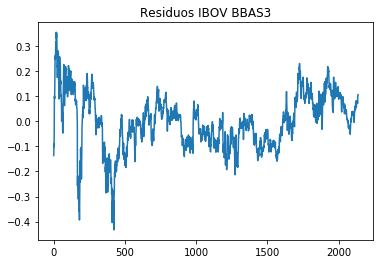

In [66]:
media_residuos_ibovbbas = ibovbbasresiduos.mean()
dp_residuos_ibovbbas = ibovbbasresiduos.std()
bs_residuos_ibovbbas = media_residuos_ibovbbas + dp_residuos_ibovbbas
bi_residuos_ibovbbas = media_residuos_ibovbbas - dp_residuos_ibovbbas

plt.plot(ibovbbasresiduos)
plt.title("Residuos IBOV BBAS3")
plt.show()

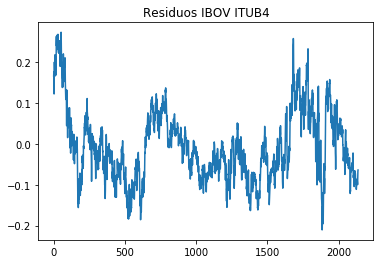

In [67]:
media_residuos_ibovitub = ibovitubresiduos.mean()
dp_residuos_ibovitub = ibovitubresiduos.std()
bs_residuos_ibovitub = media_residuos_ibovitub + dp_residuos_ibovitub
bi_residuos_ibovitub = media_residuos_ibovitub - dp_residuos_ibovitub

plt.plot(ibovitubresiduos)
plt.title("Residuos IBOV ITUB4")
plt.show()

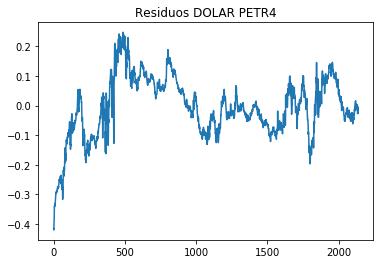

In [68]:
media_residuos_dolpetr = residuos_dolpetr.mean()
dp_residuos_dolpetr = residuos_dolpetr.std()
bs_residuos_dolpetr = media_residuos_dolpetr + dp_residuos_dolpetr
bi_residuos_dolpetr = media_residuos_dolpetr - dp_residuos_dolpetr

plt.plot(residuos_dolpetr)
plt.title("Residuos DOLAR PETR4")
plt.show()

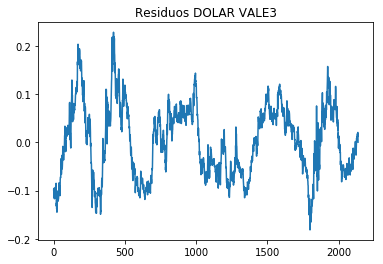

In [69]:
media_residuos_dolvale = residuos_dolvale.mean()
dp_residuos_dolvale = residuos_dolvale.std()
bs_residuos_dolvale = media_residuos_dolvale + dp_residuos_dolvale
bi_residuos_dolvale = media_residuos_dolvale - dp_residuos_dolvale

plt.plot(residuos_dolvale)
plt.title("Residuos DOLAR VALE3")
plt.show()

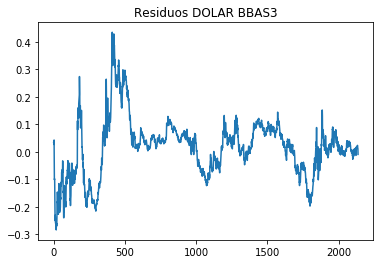

In [70]:
media_residuos_dolbbas = residuos_dolbbas.mean()
dp_residuos_dolbbas = residuos_dolbbas.std()
bs_residuos_dolbbas = media_residuos_dolbbas + dp_residuos_dolbbas
bi_residuos_dolbbas = media_residuos_dolbbas - dp_residuos_dolbbas

plt.plot(residuos_dolbbas)
plt.title("Residuos DOLAR BBAS3")
plt.show()

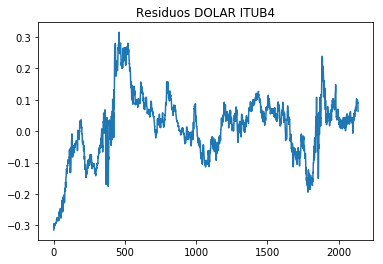

In [71]:
media_residuos_dolitub = residuos_dolitub.mean()
dp_residuos_dolitub = residuos_dolitub.std()
bs_residuos_dolitub = media_residuos_dolitub + dp_residuos_dolitub
bi_residuos_dolitub = media_residuos_dolitub - dp_residuos_dolitub

plt.plot(residuos_dolitub)
plt.title("Residuos DOLAR ITUB4")
plt.show()

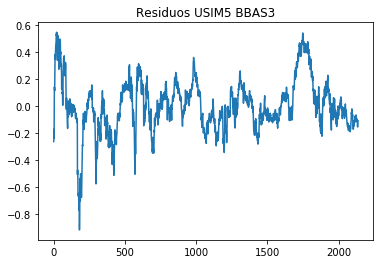

In [72]:

media_residuos_usimbbas = usimbbasresiduos.mean()
dp_residuos_usimbbas = usimbbasresiduos.std()
bs_residuos_usimbbas = media_residuos_usimbbas + dp_residuos_usimbbas
bi_residuos_usimbbas = media_residuos_usimbbas - dp_residuos_usimbbas

plt.plot(usimbbasresiduos)
plt.title("Residuos USIM5 BBAS3")
plt.show()

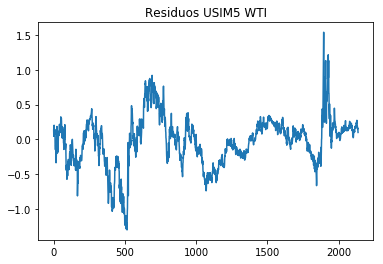

In [73]:
media_residuos_usimwti = usimwtiresiduos.mean()
dp_residuos_usimwti = usimwtiresiduos.std()
bs_residuos_usimwti = media_residuos_usimwti + dp_residuos_usimwti
bi_residuos_usimwti = media_residuos_usimwti - dp_residuos_usimwti

plt.plot(usimwtiresiduos)
plt.title("Residuos USIM5 WTI")
plt.show()

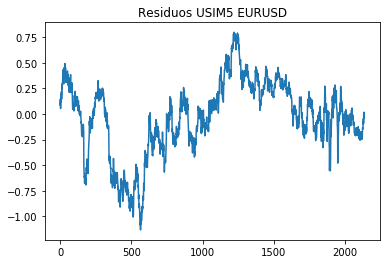

In [74]:
media_residuos_usimeurusd = usimeurusdresiduos.mean()
dp_residuos_usimeurusd = usimeurusdresiduos.std()
bs_residuos_usimeurusd = media_residuos_usimeurusd + dp_residuos_usimeurusd
bi_residuos_usimeurusd = media_residuos_usimeurusd - dp_residuos_usimeurusd

plt.plot(usimeurusdresiduos)
plt.title("Residuos USIM5 EURUSD")
plt.show()

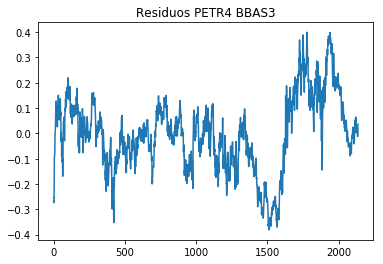

In [75]:
media_residuos_petrbbas = petrbbasresiduos.mean()
dp_residuos_petrbbas = petrbbasresiduos.std()
bs_residuos_petrbbas = media_residuos_petrbbas + dp_residuos_petrbbas
bi_residuos_petrbbas = media_residuos_petrbbas - dp_residuos_petrbbas

plt.plot(petrbbasresiduos)
plt.title("Residuos PETR4 BBAS3")
plt.show()

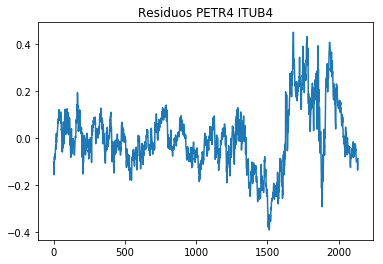

In [76]:
media_residuos_petritub = petritubresiduos.mean()
dp_residuos_petritub = petritubresiduos.std()
bs_residuos_petritub = media_residuos_petritub + dp_residuos_petritub
bi_residuos_petritub = media_residuos_petritub - dp_residuos_petritub

plt.plot(petritubresiduos)
plt.title("Residuos PETR4 ITUB4")
plt.show()

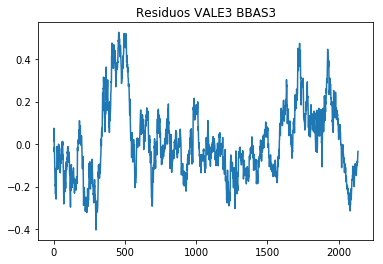

In [77]:
valebbasresiduos_ = np.array(valebbasresiduos)
bs_valebbas_residuos = valebbasresiduos_.mean() + valebbasresiduos_.std()
bi_valebbas_residuos = valebbasresiduos_.mean() - valebbasresiduos_.std()

plt.plot(valebbasresiduos)
plt.title("Residuos VALE3 BBAS3")
plt.show()

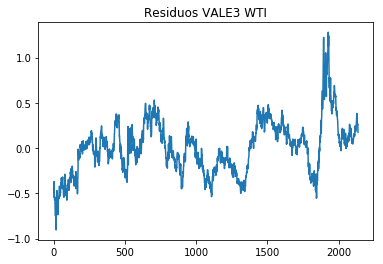

In [115]:
media_residuos_valewti = valewtiresiduos.mean()
dp_residuos_valewti = valewtiresiduos.std()
bs_residuos_valewti = media_residuos_valewti + dp_residuos_valewti
bi_residuos_valewti = media_residuos_valewti - dp_residuos_valewti

plt.plot(valewtiresiduos)
plt.title("Residuos VALE3 WTI")
plt.show()

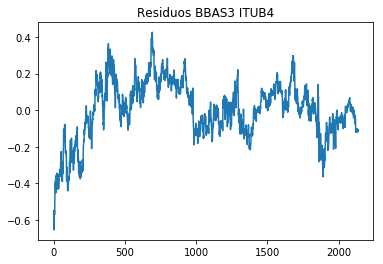

In [79]:
media_residuos_bbasitub = bbasitubresiduos.mean()
dp_residuos_bbasitub = bbasitubresiduos.std()
bs_residuos_bbasitub = media_residuos_bbasitub + dp_residuos_bbasitub
bi_residuos_bbasitub = media_residuos_bbasitub - dp_residuos_bbasitub

plt.plot(bbasitubresiduos)
plt.title("Residuos BBAS3 ITUB4")
plt.show()

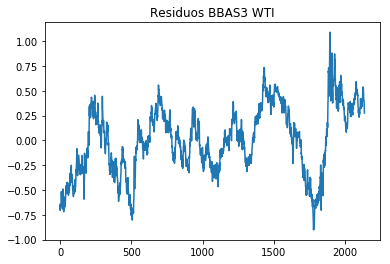

In [80]:
media_residuos_bbaswti = bbaswtiresiduos.mean()
dp_residuos_bbaswti = bbaswtiresiduos.std()
bs_residuos_bbaswti = media_residuos_bbaswti + dp_residuos_bbaswti
bi_residuos_bbaswti = media_residuos_bbaswti - dp_residuos_bbaswti

plt.plot(bbaswtiresiduos)
plt.title("Residuos BBAS3 WTI")
plt.show()

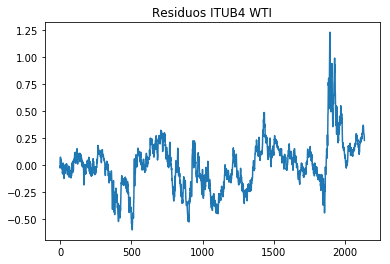

In [83]:
media_residuos_itubwti = residuositubwti.mean()
dp_residuos_itubwti = residuositubwti.std()
bs_residuos_itubwti = media_residuos_itubwti + dp_residuos_itubwti
bi_residuos_itubwti = media_residuos_itubwti - dp_residuos_itubwti


plt.plot(residuositubwti)
plt.title("Residuos ITUB4 WTI")
plt.show()

## Backtest

## IBOV ~ PETR

In [84]:
dfibovpetr = pd.concat((database["IBOV"], database["PETR4"], database["Retorno Y IBOV"],database["Retorno Y PETR4"]), axis=1)

In [85]:
dfibovpetr.head()

,IBOV,PETR4,Retorno Y IBOV,Retorno Y PETR4
2000-12-22,9.592332,1.727221,4.059265,1.718480
2000-12-26,9.602045,1.720532,4.170028,5.653676
2000-12-27,9.628129,1.733865,8.896850,9.269793
2000-12-28,9.632925,1.744406,8.874110,8.617375
2001-01-02,9.643745,1.777069,6.190134,5.551273


In [86]:
dfibovpetr["Previsto"] = ibov_petr.predict(dfibovpetr.iloc[:,1:2])

In [87]:
dfibovpetr["Residuos"] = dfibovpetr["IBOV"] - dfibovpetr["Previsto"]

In [88]:
dfibovpetr['Sinal'] = 0
dfibovpetr['Sinal'] = np.where((dfibovpetr['Sinal'].shift() == 0 ) & (dfibovpetr["Residuos"] > bs_residuos_ibovpetr),-1,
                              np.where((dfibovpetr['Sinal'].shift() == 0 ) & dfibovpetr["Residuos"] < bi_residuos_ibovpetr,1,0))

In [89]:
dfibovpetr["Pontos LS IBOV"] = dfibovpetr["Retorno Y IBOV"] * dfibovpetr["Sinal"]
dfibovpetr["Pontos LS PETR4"] = dfibovpetr["Retorno Y PETR4"] * -dfibovpetr["Sinal"]

In [94]:
dfibovpetr["Acumulado LS IBOV"] = dfibovpetr["Pontos LS IBOV"].cumsum()
dfibovpetr["Acumulado LS PETR4"] = dfibovpetr["Pontos LS PETR4"].cumsum()
dfibovpetr["Pontos LS"] = dfibovpetr["Pontos LS IBOV"] + dfibovpetr["Pontos LS PETR4"]
dfibovpetr["Acumulado Long and Short IBOV~PETR4"] = dfibovpetr["Pontos LS"].cumsum()

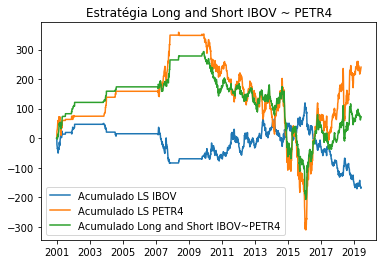

In [95]:
plt.plot(dfibovpetr["Acumulado LS IBOV"])
plt.plot(dfibovpetr["Acumulado LS PETR4"])
plt.plot(dfibovpetr["Acumulado Long and Short IBOV~PETR4"])
plt.legend()
plt.title("Estratégia Long and Short IBOV ~ PETR4")
plt.show()

## IBOV ~ VALE3

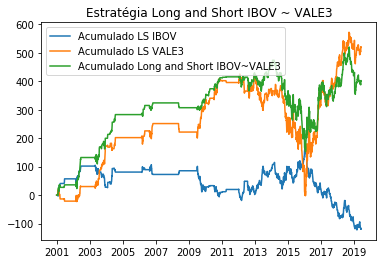

In [96]:
dfibovvale = pd.concat((database["IBOV"], database["VALE3"], database["Retorno Y IBOV"],database["Retorno Y VALE3"]), axis=1)
dfibovvale["Previsto"] = ibov_vale.predict(dfibovvale.iloc[:,1:2])
dfibovvale["Residuos"] = dfibovvale["IBOV"] - dfibovvale["Previsto"]
dfibovvale['Sinal'] = 0
dfibovvale['Sinal'] = np.where((dfibovvale['Sinal'].shift() == 0 ) & (dfibovvale["Residuos"] > bs_residuos_ibovvale),-1,
                              np.where((dfibovvale['Sinal'].shift() == 0 ) & dfibovvale["Residuos"] < bi_residuos_ibovvale,1,0))

dfibovvale["Pontos LS IBOV"] = dfibovvale["Retorno Y IBOV"] * dfibovvale["Sinal"]
dfibovvale["Pontos LS VALE3"] = dfibovvale["Retorno Y VALE3"] * -dfibovvale["Sinal"]

dfibovvale["Pontos LS"] = dfibovvale["Pontos LS IBOV"] + dfibovvale["Pontos LS VALE3"]

dfibovvale["Acumulado LS IBOV"]  = dfibovvale["Pontos LS IBOV"].cumsum()
dfibovvale["Acumulado LS VALE3"] = dfibovvale["Pontos LS VALE3"].cumsum()

dfibovvale["Acumulado Long and Short IBOV~VALE3"] = dfibovvale["Pontos LS"].cumsum()

plt.plot(dfibovvale["Acumulado LS IBOV"])
plt.plot(dfibovvale["Acumulado LS VALE3"])
plt.plot(dfibovvale["Acumulado Long and Short IBOV~VALE3"])
plt.legend()
plt.title("Estratégia Long and Short IBOV ~ VALE3")
plt.show()

## IBOV ~ BBAS3

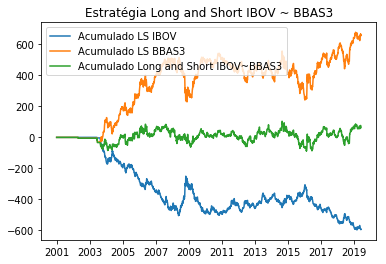

In [100]:
dfibovbbas = pd.concat((database["IBOV"], database["BBAS3"], database["Retorno Y IBOV"],database["Retorno Y BBAS3"]), axis=1)
dfibovbbas["Previsto"] = ibov_vale.predict(dfibovbbas.iloc[:,1:2])
dfibovbbas["Residuos"] = dfibovbbas["IBOV"] - dfibovbbas["Previsto"]
dfibovbbas['Sinal'] = 0
dfibovbbas['Sinal'] = np.where((dfibovbbas['Sinal'].shift() == 0 ) & (dfibovbbas["Residuos"] > bs_residuos_ibovbbas),-1,
                              np.where((dfibovbbas['Sinal'].shift() == 0 ) & dfibovbbas["Residuos"] < bi_residuos_ibovbbas,1,0))

dfibovbbas["Pontos LS IBOV"] = dfibovbbas["Retorno Y IBOV"] * dfibovbbas["Sinal"]
dfibovbbas["Pontos LS BBAS3"] = dfibovbbas["Retorno Y BBAS3"] * -dfibovbbas["Sinal"]

dfibovbbas["Pontos LS"] = dfibovbbas["Pontos LS IBOV"] + dfibovbbas["Pontos LS BBAS3"]

dfibovbbas["Acumulado LS IBOV"]  = dfibovbbas["Pontos LS IBOV"].cumsum()
dfibovbbas["Acumulado LS BBAS3"] = dfibovbbas["Pontos LS BBAS3"].cumsum()

dfibovbbas["Acumulado Long and Short IBOV~BBAS3"] = dfibovbbas["Pontos LS"].cumsum()

plt.plot(dfibovbbas["Acumulado LS IBOV"])
plt.plot(dfibovbbas["Acumulado LS BBAS3"])
plt.plot(dfibovbbas["Acumulado Long and Short IBOV~BBAS3"])
plt.legend()
plt.title("Estratégia Long and Short IBOV ~ BBAS3")
plt.show()

## IBOV ~ ITUB4

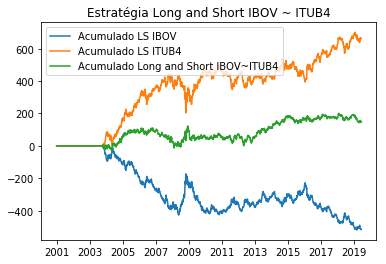

In [99]:
dfibovitub = pd.concat((database["IBOV"], database["ITUB4"], database["Retorno Y IBOV"],database["Retorno Y ITUB4"]), axis=1)
dfibovitub ["Previsto"] = ibov_vale.predict(dfibovitub .iloc[:,1:2])
dfibovitub ["Residuos"] = dfibovitub ["IBOV"] - dfibovitub ["Previsto"]
dfibovitub ['Sinal'] = 0
dfibovitub ['Sinal'] = np.where((dfibovitub ['Sinal'].shift() == 0 ) & (dfibovitub ["Residuos"] > bs_residuos_ibovitub),-1,
                              np.where((dfibovitub ['Sinal'].shift() == 0 ) & dfibovitub ["Residuos"] < bi_residuos_ibovitub,1,0))

dfibovitub ["Pontos LS IBOV"] = dfibovitub ["Retorno Y IBOV"] * dfibovitub ["Sinal"]
dfibovitub ["Pontos LS ITUB4"] = dfibovitub ["Retorno Y ITUB4"] * -dfibovitub ["Sinal"]

dfibovitub ["Pontos LS"] = dfibovitub ["Pontos LS IBOV"] + dfibovitub ["Pontos LS ITUB4"]

dfibovitub ["Acumulado LS IBOV"]  = dfibovitub ["Pontos LS IBOV"].cumsum()
dfibovitub ["Acumulado LS ITUB4"] = dfibovitub ["Pontos LS ITUB4"].cumsum()

dfibovitub ["Acumulado Long and Short IBOV~ITUB4"] = dfibovitub ["Pontos LS"].cumsum()

plt.plot(dfibovitub ["Acumulado LS IBOV"])
plt.plot(dfibovitub ["Acumulado LS ITUB4"])
plt.plot(dfibovitub ["Acumulado Long and Short IBOV~ITUB4"])
plt.legend()
plt.title("Estratégia Long and Short IBOV ~ ITUB4")
plt.show()

## DOLAR ~ PETR4

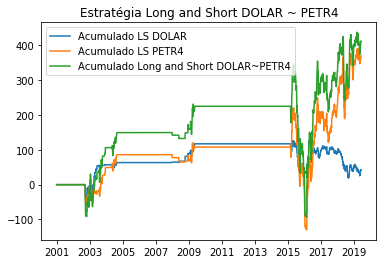

In [102]:
dfdolpetr  = pd.concat((database["DOLAR"], database["PETR4"], database["Retorno Y DOLAR"],database["Retorno Y PETR4"]), axis=1)
dfdolpetr  ["Previsto"] = dolar_petr.predict(dfdolpetr  .iloc[:,1:2])
dfdolpetr  ["Residuos"] = dfdolpetr  ["DOLAR"] - dfdolpetr  ["Previsto"]
dfdolpetr  ['Sinal'] = 0
dfdolpetr  ['Sinal'] = np.where((dfdolpetr  ['Sinal'].shift() == 0 ) & (dfdolpetr  ["Residuos"] > bs_residuos_dolpetr),-1,
                              np.where((dfdolpetr  ['Sinal'].shift() == 0 ) & dfdolpetr  ["Residuos"] < bi_residuos_dolpetr,1,0))

dfdolpetr  ["Pontos LS DOLAR"] = dfdolpetr  ["Retorno Y DOLAR"] * dfdolpetr  ["Sinal"]
dfdolpetr  ["Pontos LS PETR4"] = dfdolpetr  ["Retorno Y PETR4"] * -dfdolpetr  ["Sinal"]

dfdolpetr  ["Pontos LS"] = dfdolpetr  ["Pontos LS DOLAR"] + dfdolpetr  ["Pontos LS PETR4"]

dfdolpetr  ["Acumulado LS DOLAR"]  = dfdolpetr  ["Pontos LS DOLAR"].cumsum()
dfdolpetr  ["Acumulado LS PETR4"] = dfdolpetr  ["Pontos LS PETR4"].cumsum()

dfdolpetr  ["Acumulado Long and Short DOLAR~PETR4"] = dfdolpetr  ["Pontos LS"].cumsum()

plt.plot(dfdolpetr  ["Acumulado LS DOLAR"])
plt.plot(dfdolpetr  ["Acumulado LS PETR4"])
plt.plot(dfdolpetr  ["Acumulado Long and Short DOLAR~PETR4"])
plt.legend()
plt.title("Estratégia Long and Short DOLAR ~ PETR4")
plt.show()

## DOLAR ~ BBAS3 

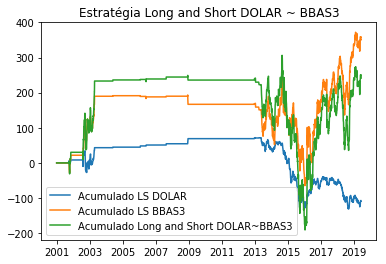

In [103]:
dfdolbbas= pd.concat((database["DOLAR"], database["BBAS3"], database["Retorno Y DOLAR"],database["Retorno Y BBAS3"]), axis=1)
dfdolbbas["Previsto"] = dolar_bbas.predict(dfdolbbas.iloc[:,1:2])
dfdolbbas["Residuos"] = dfdolbbas["DOLAR"] - dfdolbbas["Previsto"]
dfdolbbas['Sinal'] = 0
dfdolbbas['Sinal'] = np.where((dfdolbbas['Sinal'].shift() == 0 ) & (dfdolbbas["Residuos"] > bs_residuos_dolbbas),-1,
                              np.where((dfdolbbas['Sinal'].shift() == 0 ) & dfdolbbas["Residuos"] < bi_residuos_dolbbas,1,0))

dfdolbbas["Pontos LS DOLAR"] = dfdolbbas["Retorno Y DOLAR"] * dfdolbbas["Sinal"]
dfdolbbas["Pontos LS BBAS3"] = dfdolbbas["Retorno Y BBAS3"] * -dfdolbbas["Sinal"]

dfdolbbas["Pontos LS"] = dfdolbbas["Pontos LS DOLAR"] + dfdolbbas["Pontos LS BBAS3"]

dfdolbbas["Acumulado LS DOLAR"]  = dfdolbbas["Pontos LS DOLAR"].cumsum()
dfdolbbas["Acumulado LS BBAS3"] = dfdolbbas["Pontos LS BBAS3"].cumsum()

dfdolbbas["Acumulado Long and Short DOLAR~BBAS3"] = dfdolbbas["Pontos LS"].cumsum()

plt.plot(dfdolbbas["Acumulado LS DOLAR"])
plt.plot(dfdolbbas["Acumulado LS BBAS3"])
plt.plot(dfdolbbas["Acumulado Long and Short DOLAR~BBAS3"])
plt.legend()
plt.title("Estratégia Long and Short DOLAR ~ BBAS3")
plt.show()

## DOLAR ~ ITUB4

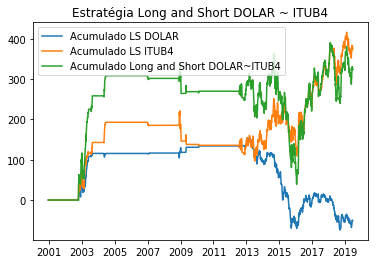

In [104]:
dfdolitub= pd.concat((database["DOLAR"], database["ITUB4"], database["Retorno Y DOLAR"],database["Retorno Y ITUB4"]), axis=1)
dfdolitub["Previsto"] = dolar_itub.predict(dfdolitub.iloc[:,1:2])
dfdolitub["Residuos"] = dfdolitub["DOLAR"] - dfdolitub["Previsto"]
dfdolitub['Sinal'] = 0
dfdolitub['Sinal'] = np.where((dfdolitub['Sinal'].shift() == 0 ) & (dfdolitub["Residuos"] > bs_residuos_dolitub),-1,
                              np.where((dfdolitub['Sinal'].shift() == 0 ) & dfdolitub["Residuos"] < bi_residuos_dolitub,1,0))

dfdolitub["Pontos LS DOLAR"] = dfdolitub["Retorno Y DOLAR"] * dfdolitub["Sinal"]
dfdolitub["Pontos LS ITUB4"] = dfdolitub["Retorno Y ITUB4"] * -dfdolitub["Sinal"]

dfdolitub["Pontos LS"] = dfdolitub["Pontos LS DOLAR"] + dfdolitub["Pontos LS ITUB4"]

dfdolitub["Acumulado LS DOLAR"]  = dfdolitub["Pontos LS DOLAR"].cumsum()
dfdolitub["Acumulado LS ITUB4"] = dfdolitub["Pontos LS ITUB4"].cumsum()

dfdolitub["Acumulado Long and Short DOLAR~ITUB4"] = dfdolitub["Pontos LS"].cumsum()

plt.plot(dfdolitub["Acumulado LS DOLAR"])
plt.plot(dfdolitub["Acumulado LS ITUB4"])
plt.plot(dfdolitub["Acumulado Long and Short DOLAR~ITUB4"])
plt.legend()
plt.title("Estratégia Long and Short DOLAR ~ ITUB4")
plt.show()

## USIM5 ~ BBAS3

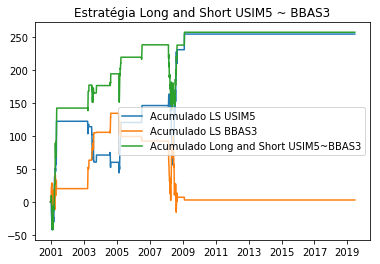

In [105]:
dfusimbbas= pd.concat((database["USIM5"], database["BBAS3"], database["Retorno Y USIM5"],database["Retorno Y BBAS3"]), axis=1)
dfusimbbas["Previsto"] = usim_bbas.predict(dfusimbbas.iloc[:,1:2])
dfusimbbas["Residuos"] = dfusimbbas["USIM5"] - dfusimbbas["Previsto"]
dfusimbbas['Sinal'] = 0
dfusimbbas['Sinal'] = np.where((dfusimbbas['Sinal'].shift() == 0 ) & (dfusimbbas["Residuos"] > bs_residuos_usimbbas),-1,
                              np.where((dfusimbbas['Sinal'].shift() == 0 ) & dfusimbbas["Residuos"] < bi_residuos_usimbbas,1,0))

dfusimbbas["Pontos LS USIM5"] = dfusimbbas["Retorno Y USIM5"] * dfusimbbas["Sinal"]
dfusimbbas["Pontos LS BBAS3"] = dfusimbbas["Retorno Y BBAS3"] * -dfusimbbas["Sinal"]

dfusimbbas["Pontos LS"] = dfusimbbas["Pontos LS USIM5"] + dfusimbbas["Pontos LS BBAS3"]

dfusimbbas["Acumulado LS USIM5"]  = dfusimbbas["Pontos LS USIM5"].cumsum()
dfusimbbas["Acumulado LS BBAS3"] = dfusimbbas["Pontos LS BBAS3"].cumsum()

dfusimbbas["Acumulado Long and Short USIM5~BBAS3"] = dfusimbbas["Pontos LS"].cumsum()

plt.plot(dfusimbbas["Acumulado LS USIM5"])
plt.plot(dfusimbbas["Acumulado LS BBAS3"])
plt.plot(dfusimbbas["Acumulado Long and Short USIM5~BBAS3"])
plt.legend()
plt.title("Estratégia Long and Short USIM5 ~ BBAS3")
plt.show()

## USIM5 ~ WTI

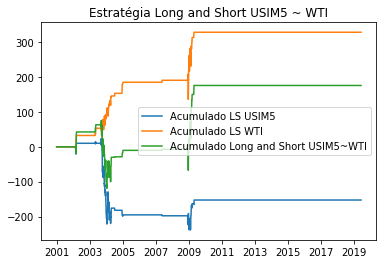

In [107]:
dfusimwti= pd.concat((database["USIM5"], database["WTI"], database["Retorno Y USIM5"],database["Retorno Y WTI"]), axis=1)
dfusimwti["Previsto"] = usim_wti.predict(dfusimwti.iloc[:,1:2])
dfusimwti["Residuos"] = dfusimwti["USIM5"] - dfusimwti["Previsto"]
dfusimwti['Sinal'] = 0
dfusimwti['Sinal'] = np.where((dfusimwti['Sinal'].shift() == 0 ) & (dfusimwti["Residuos"] > bs_residuos_usimwti),-1,
                              np.where((dfusimwti['Sinal'].shift() == 0 ) & dfusimwti["Residuos"] < bi_residuos_usimwti,1,0))

dfusimwti["Pontos LS USIM5"] = dfusimwti["Retorno Y USIM5"] * dfusimwti["Sinal"]
dfusimwti["Pontos LS WTI"] = dfusimwti["Retorno Y WTI"] * -dfusimwti["Sinal"]

dfusimwti["Pontos LS"] = dfusimwti["Pontos LS USIM5"] + dfusimwti["Pontos LS WTI"]

dfusimwti["Acumulado LS USIM5"]  = dfusimwti["Pontos LS USIM5"].cumsum()
dfusimwti["Acumulado LS WTI"] = dfusimwti["Pontos LS WTI"].cumsum()

dfusimwti["Acumulado Long and Short USIM5~WTI"] = dfusimwti["Pontos LS"].cumsum()

plt.plot(dfusimwti["Acumulado LS USIM5"])
plt.plot(dfusimwti["Acumulado LS WTI"])
plt.plot( dfusimwti["Acumulado Long and Short USIM5~WTI"])
plt.legend()
plt.title("Estratégia Long and Short USIM5 ~ WTI")
plt.show()

## USIM5 ~ EURUSD

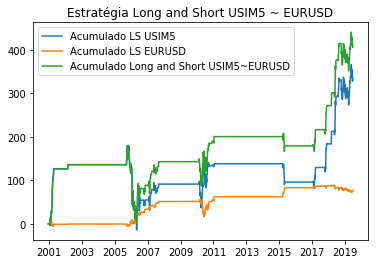

In [108]:
dfusimeurusd= pd.concat((database["USIM5"], database["EURUSD"], database["Retorno Y USIM5"],database["Retorno Y EURUSD"]), axis=1)
dfusimeurusd["Previsto"] = usim_eurusd.predict(dfusimeurusd.iloc[:,1:2])
dfusimeurusd["Residuos"] = dfusimeurusd["USIM5"] - dfusimeurusd["Previsto"]
dfusimeurusd['Sinal'] = 0
dfusimeurusd['Sinal'] = np.where((dfusimeurusd['Sinal'].shift() == 0 ) & (dfusimeurusd["Residuos"] > bs_residuos_usimeurusd),-1,
                              np.where((dfusimeurusd['Sinal'].shift() == 0 ) & dfusimeurusd["Residuos"] < bi_residuos_usimeurusd,1,0))

dfusimeurusd["Pontos LS USIM5"] = dfusimeurusd["Retorno Y USIM5"] * dfusimeurusd["Sinal"]
dfusimeurusd["Pontos LS EURUSD"] = dfusimeurusd["Retorno Y EURUSD"] * -dfusimeurusd["Sinal"]

dfusimeurusd["Pontos LS"] = dfusimeurusd["Pontos LS USIM5"] + dfusimeurusd["Pontos LS EURUSD"]

dfusimeurusd["Acumulado LS USIM5"]  = dfusimeurusd["Pontos LS USIM5"].cumsum()
dfusimeurusd["Acumulado LS EURUSD"] = dfusimeurusd["Pontos LS EURUSD"].cumsum()

dfusimeurusd["Acumulado Long and Short USIM5~EURUSD"] = dfusimeurusd["Pontos LS"].cumsum()

plt.plot(dfusimeurusd["Acumulado LS USIM5"])
plt.plot(dfusimeurusd["Acumulado LS EURUSD"])
plt.plot(dfusimeurusd["Acumulado Long and Short USIM5~EURUSD"])
plt.legend()
plt.title("Estratégia Long and Short USIM5 ~ EURUSD")
plt.show()

## PETR4 ~ BBAS3

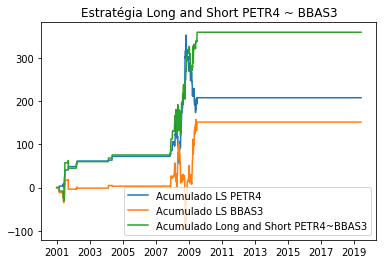

In [110]:
dfpetrbbas= pd.concat((database["PETR4"], database["BBAS3"], database["Retorno Y PETR4"],database["Retorno Y BBAS3"]), axis=1)
dfpetrbbas["Previsto"] = petr_bbas.predict(dfpetrbbas.iloc[:,1:2])
dfpetrbbas["Residuos"] = dfpetrbbas["PETR4"] - dfpetrbbas["Previsto"]
dfpetrbbas['Sinal'] = 0
dfpetrbbas['Sinal'] = np.where((dfpetrbbas['Sinal'].shift() == 0 ) & (dfpetrbbas["Residuos"] > bs_residuos_petrbbas),-1,
                              np.where((dfpetrbbas['Sinal'].shift() == 0 ) & dfpetrbbas["Residuos"] < bi_residuos_petrbbas,1,0))

dfpetrbbas["Pontos LS PETR4"] = dfpetrbbas["Retorno Y PETR4"] * dfpetrbbas["Sinal"]
dfpetrbbas["Pontos LS BBAS3"] = dfpetrbbas["Retorno Y BBAS3"] * -dfpetrbbas["Sinal"]

dfpetrbbas["Pontos LS"] = dfpetrbbas["Pontos LS PETR4"] + dfpetrbbas["Pontos LS BBAS3"]

dfpetrbbas["Acumulado LS PETR4"]  = dfpetrbbas["Pontos LS PETR4"].cumsum()
dfpetrbbas["Acumulado LS BBAS3"] = dfpetrbbas["Pontos LS BBAS3"].cumsum()

dfpetrbbas["Acumulado Long and Short PETR4~BBAS3"] = dfpetrbbas["Pontos LS"].cumsum()

plt.plot(dfpetrbbas["Acumulado LS PETR4"])
plt.plot(dfpetrbbas["Acumulado LS BBAS3"])
plt.plot(dfpetrbbas["Acumulado Long and Short PETR4~BBAS3"])
plt.legend()
plt.title("Estratégia Long and Short PETR4 ~ BBAS3")
plt.show()

## PETR4 ~ ITUB4

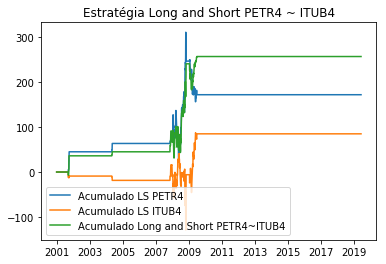

In [111]:
dfpetritub= pd.concat((database["PETR4"], database["ITUB4"], database["Retorno Y PETR4"],database["Retorno Y ITUB4"]), axis=1)
dfpetritub["Previsto"] = petr_itub.predict(dfpetritub.iloc[:,1:2])
dfpetritub["Residuos"] = dfpetritub["PETR4"] - dfpetritub["Previsto"]
dfpetritub['Sinal'] = 0
dfpetritub['Sinal'] = np.where((dfpetritub['Sinal'].shift() == 0 ) & (dfpetritub["Residuos"] > bs_residuos_petritub),-1,
                              np.where((dfpetritub['Sinal'].shift() == 0 ) & dfpetritub["Residuos"] < bi_residuos_petritub,1,0))

dfpetritub["Pontos LS PETR4"] = dfpetritub["Retorno Y PETR4"] * dfpetritub["Sinal"]
dfpetritub["Pontos LS ITUB4"] = dfpetritub["Retorno Y ITUB4"] * -dfpetritub["Sinal"]

dfpetritub["Pontos LS"] = dfpetritub["Pontos LS PETR4"] + dfpetritub["Pontos LS ITUB4"]

dfpetritub["Acumulado LS PETR4"]  = dfpetritub["Pontos LS PETR4"].cumsum()
dfpetritub["Acumulado LS ITUB4"] = dfpetritub["Pontos LS ITUB4"].cumsum()

dfpetritub["Acumulado Long and Short PETR4~ITUB4"] = dfpetritub["Pontos LS"].cumsum()

plt.plot(dfpetritub["Acumulado LS PETR4"])
plt.plot(dfpetritub["Acumulado LS ITUB4"])
plt.plot(dfpetritub["Acumulado Long and Short PETR4~ITUB4"])
plt.legend()
plt.title("Estratégia Long and Short PETR4 ~ ITUB4")
plt.show()

## VALE3 ~ BBAS3 

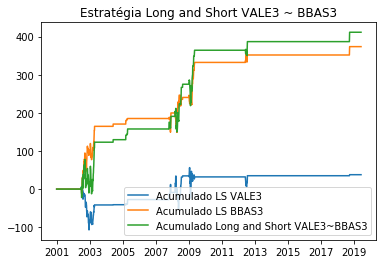

In [113]:
dfvalebbas= pd.concat((database["VALE3"], database["BBAS3"], database["Retorno Y VALE3"],database["Retorno Y BBAS3"]), axis=1)
dfvalebbas["Previsto"] = vale_bbas.predict(dfvalebbas.iloc[:,1:2])
dfvalebbas["Residuos"] = dfvalebbas["VALE3"] - dfvalebbas["Previsto"]
dfvalebbas['Sinal'] = 0
dfvalebbas['Sinal'] = np.where((dfvalebbas['Sinal'].shift() == 0 ) & (dfvalebbas["Residuos"] > bs_valebbas_residuos),-1,
                              np.where((dfvalebbas['Sinal'].shift() == 0 ) & dfvalebbas["Residuos"] < bi_valebbas_residuos,1,0))

dfvalebbas["Pontos LS VALE3"] = dfvalebbas["Retorno Y VALE3"] * dfvalebbas["Sinal"]
dfvalebbas["Pontos LS BBAS3"] = dfvalebbas["Retorno Y BBAS3"] * -dfvalebbas["Sinal"]

dfvalebbas["Pontos LS"] = dfvalebbas["Pontos LS VALE3"] + dfvalebbas["Pontos LS BBAS3"]

dfvalebbas["Acumulado LS VALE3"]  = dfvalebbas["Pontos LS VALE3"].cumsum()
dfvalebbas["Acumulado LS BBAS3"] = dfvalebbas["Pontos LS BBAS3"].cumsum()

dfvalebbas["Acumulado Long and Short VALE3~BBAS3"] = dfvalebbas["Pontos LS"].cumsum()

plt.plot(dfvalebbas["Acumulado LS VALE3"])
plt.plot(dfvalebbas["Acumulado LS BBAS3"])
plt.plot(dfvalebbas["Acumulado Long and Short VALE3~BBAS3"])
plt.legend()
plt.title("Estratégia Long and Short VALE3 ~ BBAS3")
plt.show()

## VALE3 ~ WTI

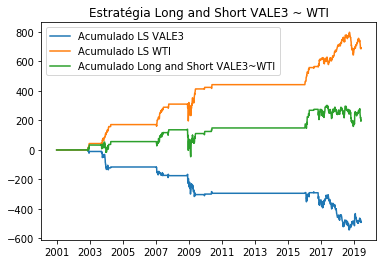

In [116]:
dfvalewti= pd.concat((database["VALE3"], database["WTI"], database["Retorno Y VALE3"],database["Retorno Y WTI"]), axis=1)
dfvalewti["Previsto"] = vale_wti.predict(dfvalewti.iloc[:,1:2])
dfvalewti["Residuos"] = dfvalewti["VALE3"] - dfvalewti["Previsto"]
dfvalewti['Sinal'] = 0
dfvalewti['Sinal'] = np.where((dfvalewti['Sinal'].shift() == 0 ) & (dfvalewti["Residuos"] > bs_residuos_valewti),-1,
                              np.where((dfvalewti['Sinal'].shift() == 0 ) & dfvalewti["Residuos"] < bi_residuos_valewti,1,0))

dfvalewti["Pontos LS VALE3"] = dfvalewti["Retorno Y VALE3"] * dfvalewti["Sinal"]
dfvalewti["Pontos LS WTI"] = dfvalewti["Retorno Y WTI"] * -dfvalewti["Sinal"]

dfvalewti["Pontos LS"] = dfvalewti["Pontos LS VALE3"] + dfvalewti["Pontos LS WTI"]

dfvalewti["Acumulado LS VALE3"]  = dfvalewti["Pontos LS VALE3"].cumsum()
dfvalewti["Acumulado LS WTI"] = dfvalewti["Pontos LS WTI"].cumsum()

dfvalewti["Acumulado Long and Short VALE3~WTI"] = dfvalewti["Pontos LS"].cumsum()

plt.plot(dfvalewti["Acumulado LS VALE3"])
plt.plot(dfvalewti["Acumulado LS WTI"])
plt.plot(  dfvalewti["Acumulado Long and Short VALE3~WTI"]  )
plt.legend()
plt.title("Estratégia Long and Short VALE3 ~ WTI")
plt.show()

## BBAS3 ~ ITUB4

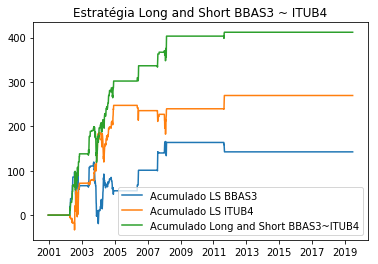

In [117]:
dfbbasitub= pd.concat((database["BBAS3"], database["ITUB4"], database["Retorno Y BBAS3"],database["Retorno Y ITUB4"]), axis=1)
dfbbasitub["Previsto"] = bbas_itub.predict(dfbbasitub.iloc[:,1:2])
dfbbasitub["Residuos"] = dfbbasitub["BBAS3"] - dfbbasitub["Previsto"]
dfbbasitub['Sinal'] = 0
dfbbasitub['Sinal'] = np.where((dfbbasitub['Sinal'].shift() == 0 ) & (dfbbasitub["Residuos"] > bs_residuos_bbasitub),-1,
                              np.where((dfbbasitub['Sinal'].shift() == 0 ) & dfbbasitub["Residuos"] < bi_residuos_bbasitub,1,0))

dfbbasitub["Pontos LS BBAS3"] = dfbbasitub["Retorno Y BBAS3"] * dfbbasitub["Sinal"]
dfbbasitub["Pontos LS ITUB4"] = dfbbasitub["Retorno Y ITUB4"] * -dfbbasitub["Sinal"]

dfbbasitub["Pontos LS"] = dfbbasitub["Pontos LS BBAS3"] + dfbbasitub["Pontos LS ITUB4"]

dfbbasitub["Acumulado LS BBAS3"]  = dfbbasitub["Pontos LS BBAS3"].cumsum()
dfbbasitub["Acumulado LS ITUB4"] = dfbbasitub["Pontos LS ITUB4"].cumsum()

dfbbasitub["Acumulado Long and Short BBAS3~ITUB4"] = dfbbasitub["Pontos LS"].cumsum()

plt.plot(dfbbasitub["Acumulado LS BBAS3"])
plt.plot(dfbbasitub["Acumulado LS ITUB4"])
plt.plot(dfbbasitub["Acumulado Long and Short BBAS3~ITUB4"])
plt.legend()
plt.title("Estratégia Long and Short BBAS3 ~ ITUB4")
plt.show()

## BBAS3 ~ WTI

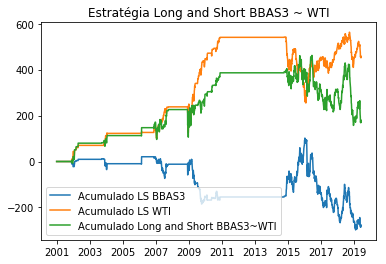

In [118]:
dfbbaswti= pd.concat((database["BBAS3"], database["WTI"], database["Retorno Y BBAS3"],database["Retorno Y WTI"]), axis=1)
dfbbaswti["Previsto"] = bbas_wti.predict(dfbbaswti.iloc[:,1:2])
dfbbaswti["Residuos"] = dfbbaswti["BBAS3"] - dfbbaswti["Previsto"]
dfbbaswti['Sinal'] = 0
dfbbaswti['Sinal'] = np.where((dfbbaswti['Sinal'].shift() == 0 ) & (dfbbaswti["Residuos"] > bs_residuos_bbaswti),-1,
                              np.where((dfbbaswti['Sinal'].shift() == 0 ) & dfbbaswti["Residuos"] < bi_residuos_bbaswti,1,0))

dfbbaswti["Pontos LS BBAS3"] = dfbbaswti["Retorno Y BBAS3"] * dfbbaswti["Sinal"]
dfbbaswti["Pontos LS WTI"] = dfbbaswti["Retorno Y WTI"] * -dfbbaswti["Sinal"]

dfbbaswti["Pontos LS"] = dfbbaswti["Pontos LS BBAS3"] + dfbbaswti["Pontos LS WTI"]

dfbbaswti["Acumulado LS BBAS3"]  = dfbbaswti["Pontos LS BBAS3"].cumsum()
dfbbaswti["Acumulado LS WTI"] = dfbbaswti["Pontos LS WTI"].cumsum()

dfbbaswti["Acumulado Long and Short BBAS3~WTI"] = dfbbaswti["Pontos LS"].cumsum()

plt.plot(dfbbaswti["Acumulado LS BBAS3"])
plt.plot(dfbbaswti["Acumulado LS WTI"])
plt.plot(dfbbaswti["Acumulado Long and Short BBAS3~WTI"])
plt.legend()
plt.title("Estratégia Long and Short BBAS3 ~ WTI")
plt.show()

## ITUB4 ~ WTI

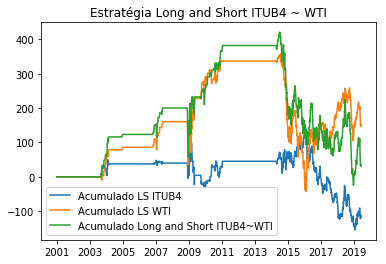

In [119]:
dfitubwti= pd.concat((database["ITUB4"], database["WTI"], database["Retorno Y ITUB4"],database["Retorno Y WTI"]), axis=1)
dfitubwti["Previsto"] = itub_wti.predict(dfitubwti.iloc[:,1:2])
dfitubwti["Residuos"] = dfitubwti["ITUB4"] - dfitubwti["Previsto"]
dfitubwti['Sinal'] = 0
dfitubwti['Sinal'] = np.where((dfitubwti['Sinal'].shift() == 0 ) & (dfitubwti["Residuos"] > bs_residuos_itubwti),-1,
                              np.where((dfitubwti['Sinal'].shift() == 0 ) & dfitubwti["Residuos"] < bi_residuos_itubwti,1,0))

dfitubwti["Pontos LS ITUB4"] = dfitubwti["Retorno Y ITUB4"] * dfitubwti["Sinal"]
dfitubwti["Pontos LS WTI"] = dfitubwti["Retorno Y WTI"] * -dfitubwti["Sinal"]

dfitubwti["Pontos LS"] = dfitubwti["Pontos LS ITUB4"] + dfitubwti["Pontos LS WTI"]

dfitubwti["Acumulado LS ITUB4"]  = dfitubwti["Pontos LS ITUB4"].cumsum()
dfitubwti["Acumulado LS WTI"] = dfitubwti["Pontos LS WTI"].cumsum()

dfitubwti["Acumulado Long and Short ITUB4~WTI"] = dfitubwti["Pontos LS"].cumsum()

plt.plot(dfitubwti["Acumulado LS ITUB4"])
plt.plot(dfitubwti["Acumulado LS WTI"])
plt.plot(dfitubwti["Acumulado Long and Short ITUB4~WTI"])
plt.legend()
plt.title("Estratégia Long and Short ITUB4 ~ WTI")
plt.show()

## Carteira Long and Short

In [143]:
longandshort = ( dfibovpetr["Pontos LS"].values + 
                dfibovvale["Pontos LS"].values + 
                dfibovbbas["Pontos LS"].values +
                dfibovitub ["Pontos LS"].values +
                dfdolpetr  ["Pontos LS"].values +
                dfdolbbas["Pontos LS"].values + 
                dfdolitub["Pontos LS"].values + 
                dfusimbbas["Pontos LS"].values +  
                dfusimwti["Pontos LS"].values + 
                dfusimeurusd["Pontos LS"].values + 
                dfpetrbbas["Pontos LS"].values + 
                dfpetritub["Pontos LS"].values + 
                dfvalebbas["Pontos LS"].values + 
                dfvalewti["Pontos LS"].values  +
                dfbbasitub["Pontos LS"].values + 
                dfbbaswti["Pontos LS"].values + 
                dfitubwti["Pontos LS"].values)

In [144]:
longandshort = pd.DataFrame(longandshort)
longandshort.columns = [ 'Pontos LS' ]
longandshort['Carteira Long and Short'] = longandshort['Pontos LS' ].cumsum()


longandshort["IBOV"] = database["IBOV"].values
longandshort["Retorno Buy and Hold IBOV"] = 100 * (longandshort['IBOV'].diff())
longandshort['Buy and Hold'] = longandshort["Retorno Buy and Hold IBOV"].cumsum()


longandshort.index = dfitubwti.index

In [145]:
longandshort.head()

,Pontos LS,Carteira Long and Short,IBOV,Retorno Buy and Hold IBOV,Buy and Hold
2000-12-22,0.000000,0.000000,9.592332,NaN,NaN
2000-12-26,1.483648,1.483648,9.602045,0.971244,0.971244
2000-12-27,0.372943,1.856591,9.628129,2.608466,3.579711
2000-12-28,-0.256735,1.599855,9.632925,0.479554,4.059265
2001-01-02,-0.638861,0.960995,9.643745,1.082008,5.141272


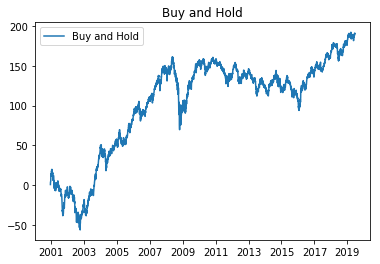

In [146]:
plt.plot(longandshort['Buy and Hold'])
plt.legend()
plt.title('Buy and Hold')
plt.show()

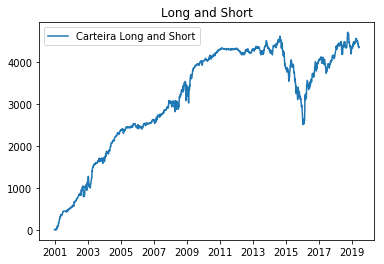

In [147]:
plt.plot(longandshort['Carteira Long and Short'])
plt.legend()
plt.title('Long and Short')
plt.show()

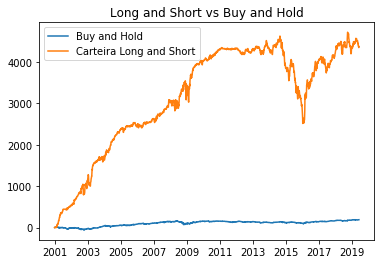

In [148]:
plt.plot(longandshort['Buy and Hold'])
plt.plot(longandshort['Carteira Long and Short'])
plt.legend()
plt.title('Long and Short vs Buy and Hold')
plt.show()

In [151]:
print('Desvio Padrão Buy and Hold: ',  (longandshort['Retorno Buy and Hold IBOV'].std()))

print('Desvio Padrão Long and Short: ',  (longandshort['Pontos LS'].std()))

Desvio Padrão Buy and Hold:  1.7777751674911026
Desvio Padrão Long and Short:  14.600652945399599
